In [18]:
import pandas as pd # For data manipulation
import numpy as np # For numerical operations
import glob # to read all the files at once
import os # Get the current working directory
import dill # For saving and loading Python objects
import matplotlib.pyplot as plt # For plotting
import seaborn as sns
import scipy.stats as stats # For statistical tests
# from sklearn.linear_model import LinearRegression # For linear regression
import statsmodels.formula.api as smf # For statistical models
from scipy.optimize import minimize # For optimization

In [2]:
# os.chdir('/Users/daniil/Library/CloudStorage/OneDrive-IndianaUniversity/Documents/Experiments/IU/Memorability Rocks/Exp1/Exp1_analysis') # Change to the directory where the data is stored

In [19]:
# Load and automatically restore all variables to global namespace
with open("Exp1_analysis.pkl", "rb") as f:
    loaded_vars = dill.load(f)
    globals().update(loaded_vars)

print(f"Loaded {len(loaded_vars)} variables:", list(loaded_vars.keys()))

Loaded 3 variables: ['credited_IDs', 'individ_hs_optim_gr1', 'individ_hs_optim_gr2']


# Load data

In [124]:
# Read Data

# Path to your Data folder
data_folder = 'Data/New_Version_120_Targets'

# Get all JSON files in the folder
files = glob.glob(os.path.join(data_folder, '*.json'))
# Keep only files whose filename (without path) splits into 3 parts on "_"
files = [f for f in files if len(os.path.basename(f).split('_')) == 3]

# Read and concatenate all files
data_frames = [pd.read_json(file) for file in files]
data_set = pd.concat(data_frames, ignore_index=True)
data_set

,width,height,webaudio,browser,browser_version,mobile,os,fullscreen,vsync_rate,webcam,...,task,broad_category,image_png,image_id,category_name,category,distinct_rating,correct_response,item_type,cor_ans
0,1470.0,831.0,1.0,chrome,140.0.0,0.0,Mac OS,1.0,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,test_phase,M,M_Migmatite_09.png,249.0,Migmatite,16.0,3.84,l,Target,1.0
385109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,test_phase,I,I_Pegmatite_15.png,111.0,Pegmatite,7.0,7.02,l,Target,0.0


## Filter data

In [21]:
# Memory phase data
filtered_data_memory = data_set.loc[
    data_set['task'] == 'memory_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'category_name','category','broad_category',
     'image_png','image_id','distinct_rating']
    ].copy()
filtered_data_memory = filtered_data_memory.astype({
    "subject_id": "category", "broad_category": "category",
    "image_id": "int", "category_name": "category",
    "category": "int"
    })
filtered_data_memory.head(10)

,trial_index,subject_id,group,task,item_type,category_name,category,broad_category,image_png,image_id,distinct_rating
6,6,90229,Group2,memory_phase,NaN,Hornfels,14,M,M_Hornfels_14.png,222,2.30
8,8,90229,Group2,memory_phase,NaN,Schist,19,M,M_Schist_04.png,292,3.63
10,10,90229,Group2,memory_phase,NaN,Peridotite,8,I,I_Peridotite_03.png,115,5.71
12,12,90229,Group2,memory_phase,NaN,Sandstone,29,S,S_Sandstone_13.png,461,2.94
14,14,90229,Group2,memory_phase,NaN,Phyllite,17,M,M_Phyllite_11.png,267,3.56
16,16,90229,Group2,memory_phase,NaN,Micrite,26,S,S_Micrite_14.png,414,2.42
18,18,90229,Group2,memory_phase,NaN,Gabbro,4,I,I_Gabbro_06.png,54,3.26
20,20,90229,Group2,memory_phase,NaN,Diorite,3,I,I_Diorite_02.png,34,4.90
22,22,90229,Group2,memory_phase,NaN,Quartzite,18,M,M_Quartzite_14.png,286,3.30
24,24,90229,Group2,memory_phase,NaN,Conglomerate,24,S,S_Conglomerate_05.png,373,7.32


In [22]:
# Test phase data
filtered_data_test = data_set.loc[
    data_set['task'] == 'test_phase',
    ['trial_index','subject_id', 'group','task','item_type',
     'response','correct_response', 'cor_ans','rt', 
     'category_name', 'category','broad_category',
     'image_png', 'image_id', 'distinct_rating']
    ].copy()
filtered_data_test = filtered_data_test.astype({
    "subject_id": "category",
    "group": "category",
    'item_type': "category",
    "broad_category": "category",
    "image_id": "int",
    "category_name": "category",
    "category": "int",
    "cor_ans": "bool"
    })

filtered_data_test.head(10)

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating
248,248,90229,Group2,test_phase,Target,a,l,False,4494.0,Gabbro,4,I,I_Gabbro_06.png,54,3.26
250,250,90229,Group2,test_phase,Target,l,l,True,1738.0,Rock Salt,28,S,S_Rock Salt_01.png,433,7.18
252,252,90229,Group2,test_phase,Target,l,l,True,1053.0,Obsidian,6,I,I_Obsidian_06.png,86,8.01
254,254,90229,Group2,test_phase,Target,l,l,True,3124.0,Granite,5,I,I_Granite_03.png,67,3.60
256,256,90229,Group2,test_phase,Foil,a,a,True,4779.0,Dolomite,25,S,S_Dolomite_09.png,393,2.11
258,258,90229,Group2,test_phase,Target,l,l,True,1957.0,Gneiss,13,M,M_Gneiss_08.png,200,3.69
260,260,90229,Group2,test_phase,Target,l,l,True,2031.0,Peridotite,8,I,I_Peridotite_08.png,120,4.77
262,262,90229,Group2,test_phase,Target,l,l,True,961.0,Rock Gypsum,27,S,S_Rock Gypsum_11.png,427,4.73
264,264,90229,Group2,test_phase,Target,l,l,True,879.0,Rock Gypsum,27,S,S_Rock Gypsum_14.png,430,7.01
266,266,90229,Group2,test_phase,Foil,l,a,False,1903.0,Basalt,2,I,I_Basalt_03.png,19,2.94


# Grant credit for participation

In [23]:
percent_cor_IDs = (filtered_data_test
 .groupby(['subject_id','group'], observed=True)['cor_ans']
 .mean() # mean per subject
 .reset_index()
 )
percent_cor_IDs['cor_ans'].describe()  # descriptive statistics across subjects

count    529.000000
mean       0.529442
std        0.045621
min        0.420833
25%        0.500000
50%        0.525000
75%        0.558333
max        0.729167
Name: cor_ans, dtype: float64

In [24]:
# t-test compare with chance level (0.5)
stats.ttest_1samp(percent_cor_IDs['cor_ans'], popmean=0.5)

TtestResult(statistic=14.843321040264321, pvalue=6.60151006259389e-42, df=528)

In [25]:
# by group
(percent_cor_IDs
 .groupby('group', observed=True)['cor_ans']
 .agg(['mean','std','count','sem'])
 )

,mean,std,count,sem
group,,,,
Group1,0.535996,0.049984,266,0.003065
Group2,0.522814,0.039745,263,0.002451


In [26]:
# compare two groups
stats.ttest_ind(percent_cor_IDs.loc[percent_cor_IDs['group'] == 'Group1', 'cor_ans'],
                percent_cor_IDs.loc[percent_cor_IDs['group'] == 'Group2', 'cor_ans'])

TtestResult(statistic=3.3550488250156794, pvalue=0.0008506724682233479, df=527.0)

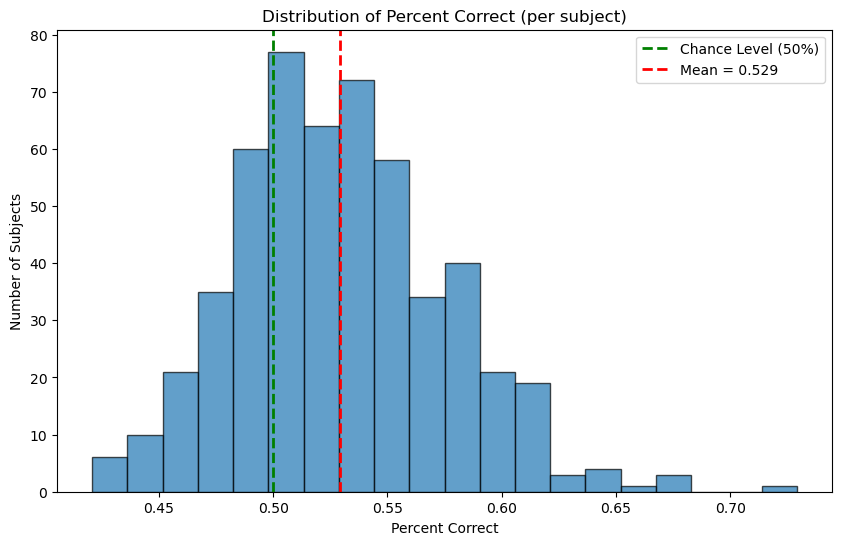

In [27]:
# unified plot
plt.figure(figsize=(10, 6))
plt.hist(percent_cor_IDs['cor_ans'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(0.5, color='green', linestyle='dashed', linewidth=2, label='Chance Level (50%)')
plt.axvline(percent_cor_IDs['cor_ans'].mean(), color='red', 
            linestyle='dashed', linewidth=2, label=f'Mean = {percent_cor_IDs["cor_ans"].mean():.3f}')
plt.xlabel("Percent Correct")
plt.ylabel("Number of Subjects")
plt.title("Distribution of Percent Correct (per subject)")
plt.legend()
plt.show()

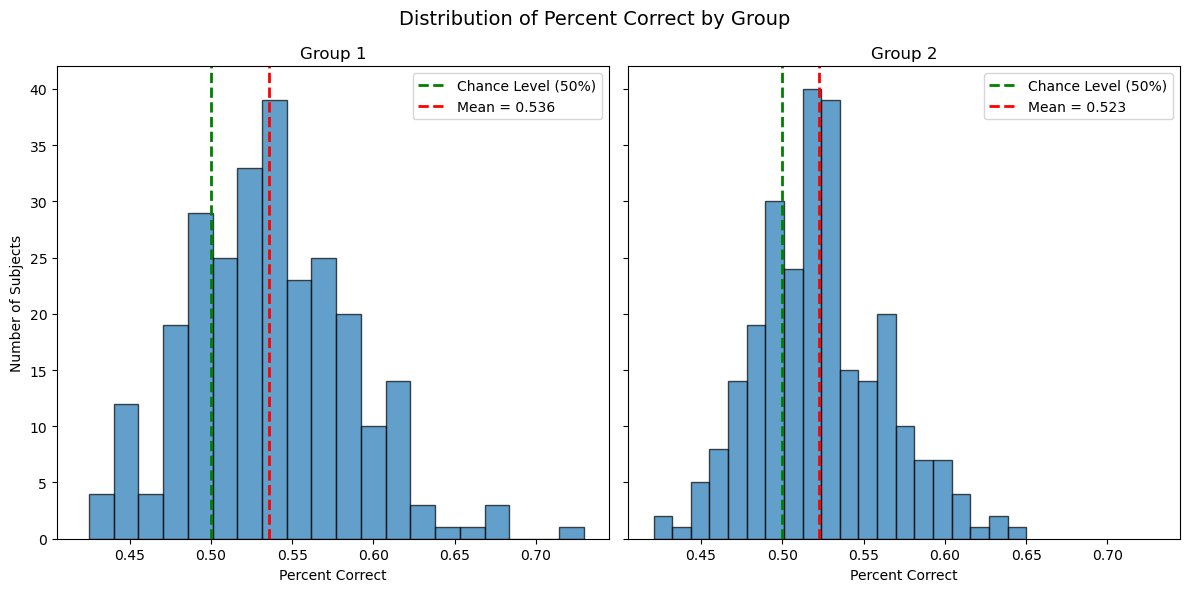

In [28]:
# by groups
groups = np.sort(percent_cor_IDs["group"].unique())
fig, axes = plt.subplots(1, len(groups), # rows, cols
                         figsize=(12, 6), 
                         sharey=True,sharex=True # share x and y axis scales
                         )

for ax, g in zip(axes, groups):
    data = percent_cor_IDs.loc[percent_cor_IDs["group"] == g, "cor_ans"]
    ax.hist(data, bins=20, edgecolor="black", alpha=0.7)
    
    # Chance level
    ax.axvline(.50, color="green", linestyle="dashed", linewidth=2, label="Chance Level (50%)")
    # Group mean
    ax.axvline(data.mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean = {data.mean():.3f}")
    
    ax.set_title(f"Group {g[-1]}") # g = 'Group1' or 'Group2', so g[-1] is '1' or '2'
    ax.set_xlabel("Percent Correct")
    ax.legend()

axes[0].set_ylabel("Number of Subjects")
fig.suptitle("Distribution of Percent Correct by Group", fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
# Get unique subject IDs from data
all_IDs = filtered_data_test['subject_id'].unique()

# Compute difference
not_credited_yet = [id for id in all_IDs if id not in credited_IDs]

print(not_credited_yet)

[90229, 89005, 88506, 86365, 86908, 90238, 87338, 90159, 90574, 88887, 86700, 86332, 87491]


In [30]:
len(not_credited_yet) # Number of subjects not credited yet

13

90231, 90155

In [31]:
credited_IDs = filtered_data_test['subject_id'].unique()

In [32]:
credited_IDs

[90229, 86566, 89466, 87372, 86281, ..., 88489, 89404, 88804, 88397, 86376]
Length: 529
Categories (529, int64): [86281, 86286, 86288, 86289, ..., 90309, 90314, 90574, 90576]

In [33]:
# IDs who completed the experiment more than once
ID_trial_count = filtered_data_test['subject_id'].value_counts()
(ID_trial_count
 .index[ np.where( ID_trial_count.values > 240 ) ] # IDs with more than 240 trials
 .tolist() # more readable format
 )

[]

86618 - оставить из второй группы (28/10/25)

88893 - оставить группу 1

# d' by ID

Calculate d' with adjustments (for both hits and false alarms Macmillan & Kaplan, 1985), so that if there is a perfect (1) or terrible (0) hit, or fa, we still got a value (not infinity):
$$\text{Hit} = \frac{N_{hits} + 0.5}{N_{signal\_trials} + 1}$$

Same for FAs.

In [35]:
# Compute hits and number of signal trials per subject
hits_IDs = (
    filtered_data_test
    .loc[filtered_data_test['item_type'] == 'Target']
    .groupby('subject_id', observed=True)
    .agg(
        hits=('cor_ans', 'sum'),
        signal_trials=('cor_ans', 'count')
    )
    .reset_index()
)

# Compute unadjusted hit rate
hits_IDs['Hit_rate'] = hits_IDs['hits'] / hits_IDs['signal_trials']

# Apply Macmillan & Kaplan (1985) correction
hits_IDs['Hit_rate_adj'] = (hits_IDs['hits'] + 0.5) / (hits_IDs['signal_trials'] + 1)
hits_IDs

,subject_id,hits,signal_trials,Hit_rate,Hit_rate_adj
0,86281,76,120,0.633333,0.632231
1,86286,77,120,0.641667,0.640496
2,86288,82,120,0.683333,0.681818
3,86289,66,120,0.550000,0.549587
4,86291,89,120,0.741667,0.739669
...,...,...,...,...,...
524,90300,83,120,0.691667,0.690083
525,90309,78,120,0.650000,0.648760
526,90314,83,120,0.691667,0.690083
527,90574,68,120,0.566667,0.566116


In [36]:
# Compute false alarms and number of noise trials per subject
FA_IDs = (
    filtered_data_test
    .loc[filtered_data_test['item_type'] == 'Foil']
    .groupby('subject_id', observed=True)
    .agg(
        # Count "l" responses as false alarms
        FA=('response', lambda x: (x == 'l').sum()),
        noise_trials=('response', 'count')
    )
    .reset_index()
)

# Compute unadjusted false alarm rate
FA_IDs['FA_rate'] = FA_IDs['FA'] / FA_IDs['noise_trials']

# Apply Macmillan & Kaplan (1985) correction
FA_IDs['FA_rate_adj'] = (FA_IDs['FA'] + 0.5) / (FA_IDs['noise_trials'] + 1)

FA_IDs

,subject_id,FA,noise_trials,FA_rate,FA_rate_adj
0,86281,53,120,0.441667,0.442149
1,86286,66,120,0.550000,0.549587
2,86288,49,120,0.408333,0.409091
3,86289,75,120,0.625000,0.623967
4,86291,69,120,0.575000,0.574380
...,...,...,...,...,...
524,90300,73,120,0.608333,0.607438
525,90309,83,120,0.691667,0.690083
526,90314,67,120,0.558333,0.557851
527,90574,63,120,0.525000,0.524793


In [37]:
# Calculate d'
dprime_ID = pd.merge(hits_IDs, FA_IDs, on='subject_id')
dprime_ID['dprimes'] = [stats.norm.ppf(hit) - stats.norm.ppf( (fa) ) 
  for hit, fa 
  in zip(dprime_ID['Hit_rate_adj'], dprime_ID['FA_rate_adj'])
  ]

# Drop columns
dprime_ID = (dprime_ID
 .drop( columns={'hits', 'signal_trials', 'Hit_rate', 'FA', 'noise_trials', 'FA_rate'})
 .rename(columns = {'Hit_rate_adj':'Hit_rate',
                    'FA_rate_adj':'FA_rate'})
 )

dprime_ID

,subject_id,Hit_rate,FA_rate,dprimes
0,86281,0.632231,0.442149,0.483293
1,86286,0.640496,0.549587,0.235167
2,86288,0.681818,0.409091,0.702673
3,86289,0.549587,0.623967,-0.191299
4,86291,0.739669,0.574380,0.454790
...,...,...,...,...
524,90300,0.690083,0.607438,0.223437
525,90309,0.648760,0.690083,-0.114109
526,90314,0.690083,0.557851,0.350561
527,90574,0.566116,0.524793,0.104306


In [38]:
# add groups from percent_cor_IDs
dprime_ID = pd.merge(
    dprime_ID, 
    percent_cor_IDs[['subject_id','group']], 
    on='subject_id'
    )
dprime_ID

,subject_id,Hit_rate,FA_rate,dprimes,group
0,86281,0.632231,0.442149,0.483293,Group1
1,86286,0.640496,0.549587,0.235167,Group1
2,86288,0.681818,0.409091,0.702673,Group1
3,86289,0.549587,0.623967,-0.191299,Group2
4,86291,0.739669,0.574380,0.454790,Group1
...,...,...,...,...,...
524,90300,0.690083,0.607438,0.223437,Group2
525,90309,0.648760,0.690083,-0.114109,Group2
526,90314,0.690083,0.557851,0.350561,Group2
527,90574,0.566116,0.524793,0.104306,Group1


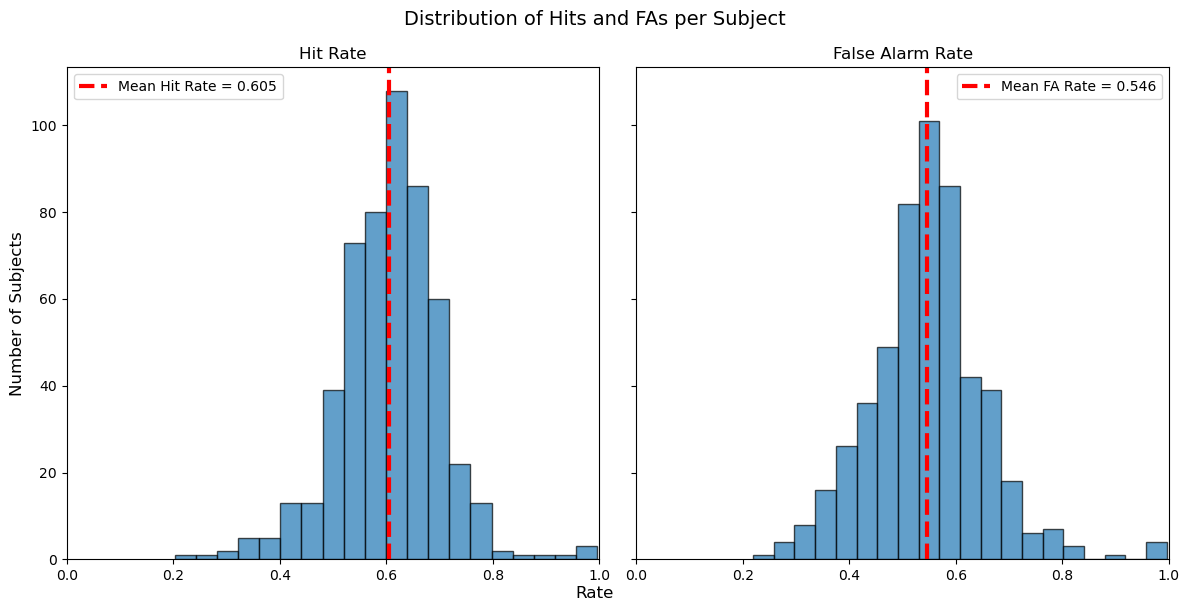

In [39]:
fig, axes = plt.subplots(1, 2, # rows, cols
                         figsize=(12, 6), 
                         sharey=True,sharex=True # share x and y axis scales
                         )


axes[0].hist(dprime_ID['Hit_rate'], bins=20, edgecolor="black", alpha=0.7)
axes[1].hist(dprime_ID['FA_rate'], bins=20, edgecolor="black", alpha=0.7)

axes[0].set_xlim(0, 1)

# Mean
axes[0].axvline(dprime_ID['Hit_rate'].mean(), color="red", 
                linestyle="dashed", linewidth=3, 
                label=f"Mean Hit Rate = {dprime_ID['Hit_rate'].mean():.3f}")
axes[1].axvline(dprime_ID['FA_rate'].mean(), color="red", 
                linestyle="dashed", linewidth=3, 
                label=f"Mean FA Rate = {dprime_ID['FA_rate'].mean():.3f}")

axes[0].set_title("Hit Rate")
axes[1].set_title("False Alarm Rate") 

fig.text(0.5, 0, "Rate", ha="center", fontsize=12)

axes[0].legend()
axes[1].legend()

axes[0].set_ylabel("Number of Subjects", fontsize=12)
fig.suptitle("Distribution of Hits and FAs per Subject", fontsize=14)
plt.tight_layout()
plt.show()

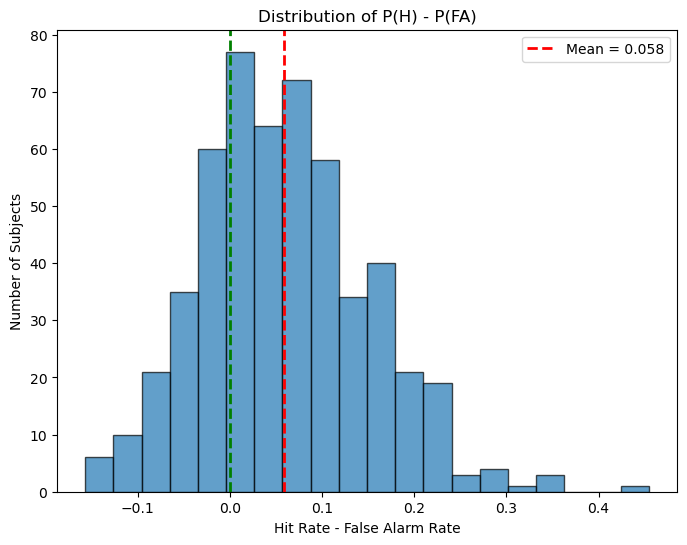

In [40]:
# p(H) - p(FA) plot
plt.figure(figsize=(8, 6))
plt.hist(dprime_ID['Hit_rate'] - dprime_ID['FA_rate'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(0, color='green', linestyle='dashed', linewidth=2)
plt.axvline((dprime_ID['Hit_rate'] - dprime_ID['FA_rate']).mean(), 
            color='red', linestyle='dashed', linewidth=2,
            label=f'Mean = {(dprime_ID["Hit_rate"] - dprime_ID["FA_rate"]).mean():.3f}')
plt.xlabel("Hit Rate - False Alarm Rate")
plt.ylabel("Number of Subjects")
plt.title("Distribution of P(H) - P(FA)")
plt.legend()
plt.show()

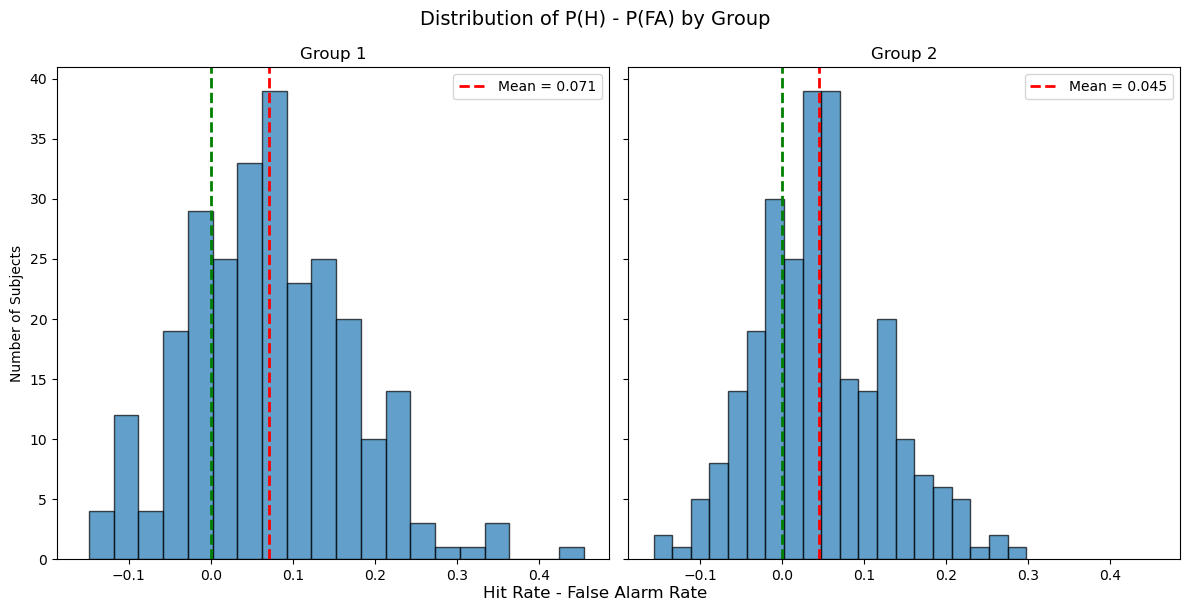

In [41]:
# p(H) - p(FA) plot by group
groups = np.sort(dprime_ID['group'].unique())

fig, axes = plt.subplots(1, len(groups), # rows, cols
                         figsize=(12, 6),
                         sharex=True, sharey=True # share x and y axis scales
                         )
for ax, g in zip(axes, groups):
    data = dprime_ID.loc[dprime_ID['group'] == g, 'Hit_rate'] - dprime_ID.loc[dprime_ID['group'] == g, 'FA_rate']
    ax.hist(data, bins=20, edgecolor="black", alpha=0.7)
    
    # Chance level
    ax.axvline(0, color='green', linestyle='dashed', linewidth=2)
    # Group mean
    ax.axvline(data.mean(), color='red', linestyle='dashed', linewidth=2,
               label=f'Mean = {data.mean():.3f}')
    
    ax.set_title(f"Group {g[-1]}") # g = 'Group1' or 'Group2', so g[-1] is '1' or '2'
    #ax.set_xlabel("Hit Rate - False Alarm Rate")
    ax.legend()

fig.text(0.5, 0, "Hit Rate - False Alarm Rate", ha="center", fontsize=12)
axes[0].set_ylabel("Number of Subjects")
fig.suptitle("Distribution of P(H) - P(FA) by Group", fontsize=14)
plt.tight_layout()
plt.show()

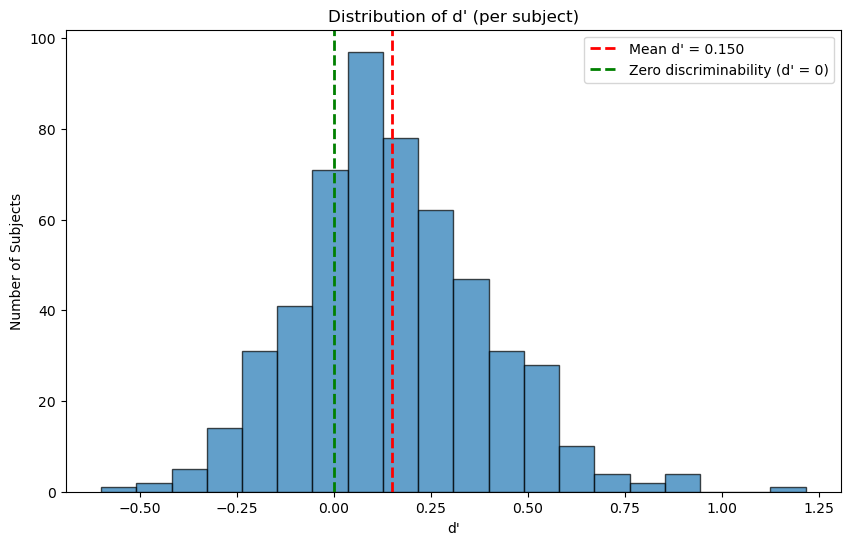

In [42]:
# d'
plt.figure(figsize=(10, 6))
plt.hist(dprime_ID['dprimes'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(np.mean(dprime_ID['dprimes']), color='red', linestyle='dashed', linewidth=2, label=f'Mean d\' = {np.mean(dprime_ID["dprimes"]):.3f}')
plt.axvline(0, color='green', linestyle='dashed', linewidth=2, label="Zero discriminability (d' = 0)")
plt.xlabel("d'")
plt.ylabel("Number of Subjects")
plt.title("Distribution of d' (per subject)")
plt.legend()
plt.show()

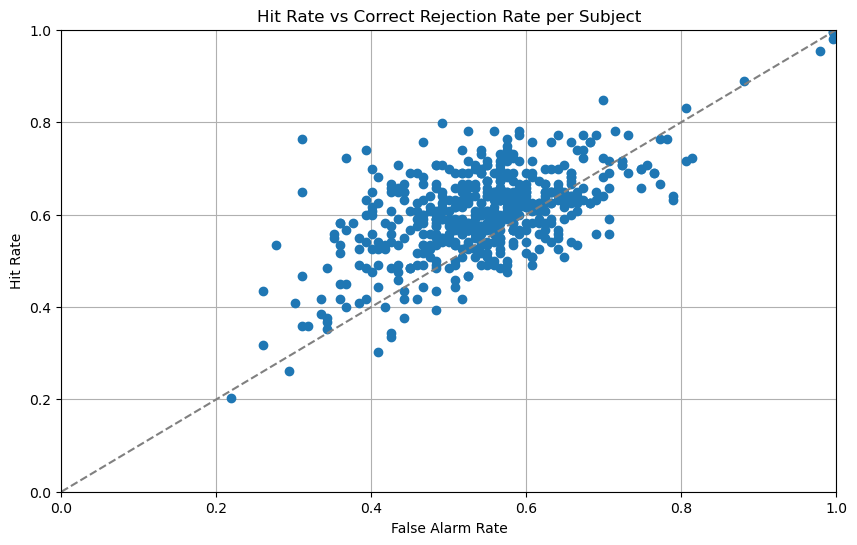

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(dprime_ID['FA_rate'], dprime_ID['Hit_rate'], 'o')
plt.axline((0, 0), slope=1, color='gray', linestyle='dashed')  # Diagonal line
plt.xlabel("False Alarm Rate")
plt.ylabel("Hit Rate")
plt.title("Hit Rate vs Correct Rejection Rate per Subject")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Filter by Hit - FA

In [44]:
dprime_ID['good_subj'] = np.where(
    dprime_ID['Hit_rate'] - dprime_ID['FA_rate'] > 0.07, True, False
    )
bad_subjects = dprime_ID.loc[dprime_ID['good_subj'] == False,'subject_id'].tolist()

In [45]:
# Filter by Hit - FA
filtered_data_test = (pd.merge(filtered_data_test, 
                               dprime_ID.loc[:,['subject_id','good_subj']], 
                               on='subject_id')
                      )
filtered_data_memory = (pd.merge(filtered_data_memory, 
                               dprime_ID.loc[:,['subject_id','good_subj']], 
                               on='subject_id')
                      )

In [46]:
# save filtered data
filtered_data_test = filtered_data_test[filtered_data_test['good_subj'] == True]
filtered_data_memory = filtered_data_memory[filtered_data_memory['good_subj'] == True]

In [47]:
filtered_data_test['subject_id'].nunique() # number of good subjects

212

In [48]:
filtered_data_test.groupby('group', observed=True)['subject_id'].nunique()

group
Group1    131
Group2     81
Name: subject_id, dtype: int64

# Percent correct by Category

In [49]:
# mean and sem by category and item_type
gr_cat_df_long = (
    filtered_data_test
    .groupby(['category_name','item_type'], observed=True)['cor_ans']
    .agg(prop_correct_mean='mean', sem=lambda x: stats.sem(x))
    .reset_index()
)
gr_cat_df_long

,category_name,item_type,prop_correct_mean,sem
0,Amphibolite,Foil,0.505896,0.017179
1,Amphibolite,Target,0.576651,0.016977
2,Andesite,Foil,0.474057,0.017157
3,Andesite,Target,0.626179,0.016624
4,Anthracite,Foil,0.352594,0.016417
5,Anthracite,Target,0.774764,0.014354
6,Basalt,Foil,0.406840,0.016879
7,Basalt,Target,0.656840,0.016313
8,Bituminous Coal,Foil,0.396226,0.016806
9,Bituminous Coal,Target,0.734670,0.015170


In [50]:
# convert CRs to FAs
gr_cat_df_long['prop_correct_mean'] = gr_cat_df_long['prop_correct_mean'].mask(
    gr_cat_df_long['item_type'] == 'prop_Foil',
    1 - gr_cat_df_long['prop_correct_mean']
)
gr_cat_df_long = gr_cat_df_long.rename(columns={'prop_correct_mean': 'mean_prop_Yes'})

gr_cat_df_long

,category_name,item_type,mean_prop_Yes,sem
0,Amphibolite,Foil,0.505896,0.017179
1,Amphibolite,Target,0.576651,0.016977
2,Andesite,Foil,0.474057,0.017157
3,Andesite,Target,0.626179,0.016624
4,Anthracite,Foil,0.352594,0.016417
5,Anthracite,Target,0.774764,0.014354
6,Basalt,Foil,0.406840,0.016879
7,Basalt,Target,0.656840,0.016313
8,Bituminous Coal,Foil,0.396226,0.016806
9,Bituminous Coal,Target,0.734670,0.015170


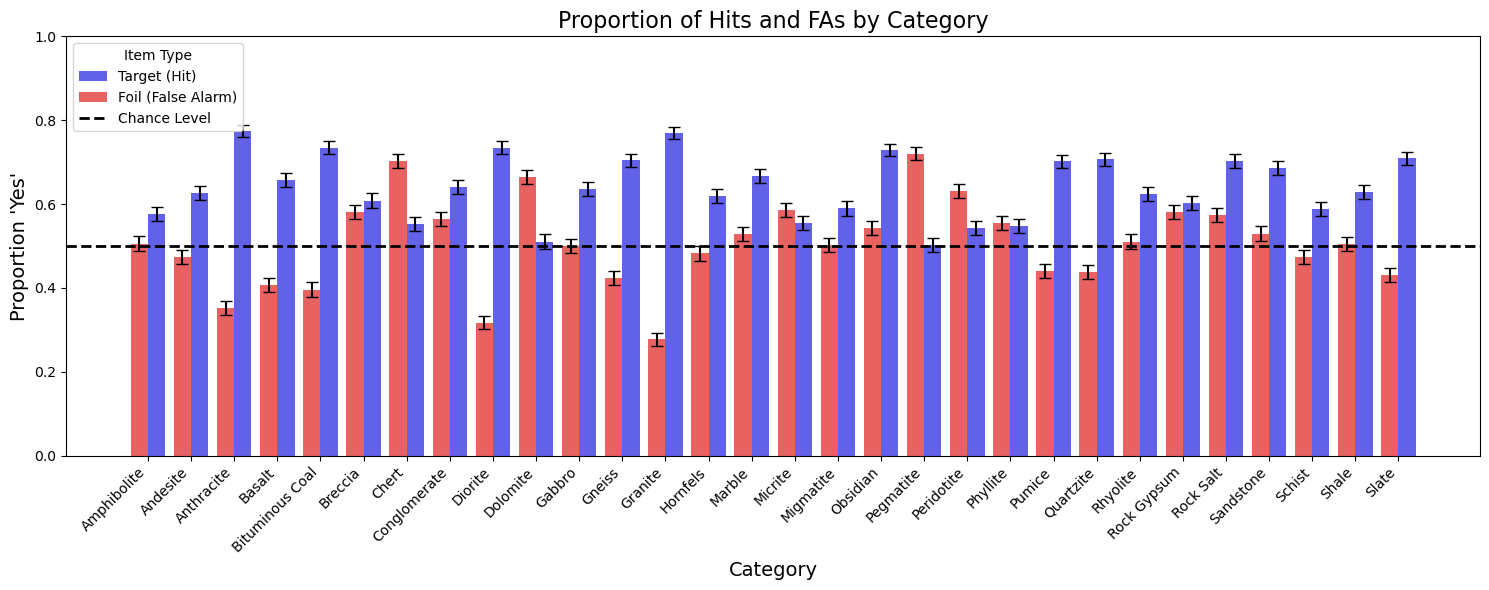

In [51]:
plt.figure(figsize=(15,6))
ax = sns.barplot(
    data=gr_cat_df_long,
    x="category_name",
    y="mean_prop_Yes",
    hue="item_type",
    palette=["red","blue"],
    errorbar=None,
    alpha=0.7
)

# SEM
for i, row in gr_cat_df_long.iterrows():
    # seaborn positions bars by category + hue, so we need to get the correct x location
    x_pos = (
        list(gr_cat_df_long['category_name'].unique()).index(row['category_name']) # find the position of the category
        + (-0.2 if row['item_type'] == 'Foil' else 0.2)  # adjust offset for hue
    )
    
    ax.errorbar(
        x=x_pos,
        y=row['mean_prop_Yes'],
        yerr=row['sem'],
        fmt='none',
        c='black',
        capsize=4,
        linewidth=1.5
    )
plt.axhline(0.5, color='black', linestyle='--', linewidth=2, label='Chance Level')

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.xlabel("Category", font = {'size': 14})
plt.ylabel("Proportion 'Yes'", font = {'size': 14})

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[i] for i in [1,0,2]], 
           ['Target (Hit)', 'Foil (False Alarm)', 'Chance Level'],
           loc='upper left', title='Item Type')

plt.title("Proportion of Hits and FAs by Category", font = {'size': 16})
plt.tight_layout()
plt.show()

# d' by item

In [52]:
df_by_item = (filtered_data_test
            .groupby(['image_id','group'], observed=True)
            .agg(n_subj=('cor_ans', 'size'),
                n_yes=('response', lambda x: (x == "l").sum()),
                item_type=('item_type', 'first'),
                category_name=('category_name', 'first'),
                distinct_rating=('distinct_rating', 'first')
                )
            .reset_index()
            .assign(prop_yes=lambda df: df['n_yes'] / df['n_subj'],
                    resp_type = lambda df: np.where(df['item_type'] == 'Target', 'Hit', 'FA')
                    )
            )
df_by_item

,image_id,group,n_subj,n_yes,item_type,category_name,distinct_rating,prop_yes,resp_type
0,2,Group1,131,61,Target,Andesite,3.93,0.465649,Hit
1,2,Group2,81,28,Foil,Andesite,3.93,0.345679,FA
2,5,Group1,131,56,Foil,Andesite,3.32,0.427481,FA
3,5,Group2,81,46,Target,Andesite,3.32,0.567901,Hit
4,6,Group1,131,86,Target,Andesite,3.17,0.656489,Hit
...,...,...,...,...,...,...,...,...,...
475,474,Group2,81,52,Foil,Shale,1.91,0.641975,FA
476,475,Group1,131,75,Target,Shale,4.05,0.572519,Hit
477,475,Group2,81,50,Foil,Shale,4.05,0.617284,FA
478,476,Group1,131,89,Target,Shale,2.48,0.679389,Hit


In [53]:
df_by_item_wide = df_by_item.pivot(index="image_id", columns="resp_type", values="prop_yes")
df_by_item_wide

resp_type,FA,Hit
image_id,,
2,0.345679,0.465649
5,0.427481,0.567901
6,0.691358,0.656489
7,0.518519,0.740458
10,0.427481,0.617284
...,...,...
471,0.519084,0.691358
472,0.351145,0.481481
474,0.641975,0.809160


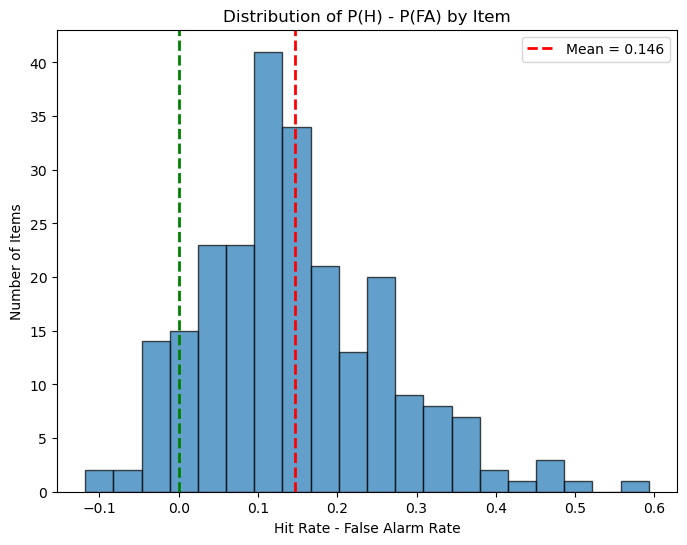

In [54]:
# p(H) - p(FA) plot by item
# df_by_item_wide = df_by_item.pivot(index="image_id", columns="resp_type", values="prop_yes")

plt.figure(figsize=(8, 6))
plt.hist(df_by_item_wide['Hit'] - df_by_item_wide['FA'], bins=20, edgecolor="black", alpha=0.7)
plt.axvline(0, color='green', linestyle='dashed', linewidth=2)
plt.axvline((df_by_item_wide['Hit'] - df_by_item_wide['FA']).mean(), 
            color='red', linestyle='dashed', linewidth=2,
            label=f'Mean = {(df_by_item_wide["Hit"] - df_by_item_wide["FA"]).mean():.3f}')
plt.xlabel("Hit Rate - False Alarm Rate")
plt.ylabel("Number of Items")
plt.title("Distribution of P(H) - P(FA) by Item")
plt.legend()
plt.show()

In [55]:
# convert resp_type to categorical
df_by_item['resp_type'] = df_by_item['resp_type'].astype('category')

In [56]:
# Simple linear regression: Y ~ X
m1 = smf.ols("prop_yes ~ distinct_rating*resp_type", data=df_by_item).fit()

print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_yes   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     70.42
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           1.06e-37
Time:                        20:53:38   Log-Likelihood:                 280.89
No. Observations:                 480   AIC:                            -553.8
Df Residuals:                     476   BIC:                            -537.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [57]:
# Test H0: slope_Hit = 0
m1.t_test("distinct_rating + distinct_rating:resp_type[T.Hit] = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0112      0.006     -1.944      0.052      -0.023       0.000

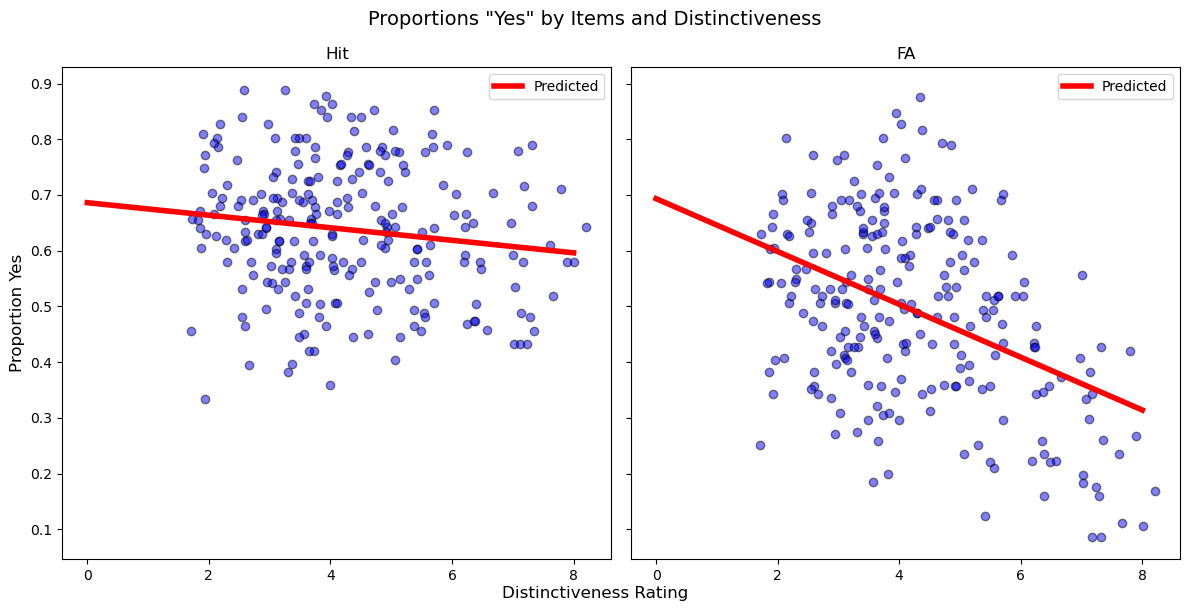

In [58]:
# Make two facets side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)

# Subset the data
hit_data = df_by_item[df_by_item["resp_type"] == "Hit"]
fa_data  = df_by_item[df_by_item["resp_type"] == "FA"]

# Scatter plots
axes[0].scatter(hit_data["distinct_rating"], hit_data["prop_yes"], alpha=0.5, edgecolor="k", color="blue")
axes[1].scatter(fa_data["distinct_rating"], fa_data["prop_yes"], alpha=0.5, edgecolor="k", color="blue")


for ax, data, title in zip(
    axes, 
    [hit_data, fa_data], 
    ["Hit", "FA"]
    ):
    
    X = pd.DataFrame({
        "resp_type": np.repeat(title, 9),       # repeat each category
        "distinct_rating": list(range(0, 9)) # 0–8 for each category
        })
    y = m1.predict(X)
    
    ax.plot(X["distinct_rating"], y, color="red", linewidth=4, label="Predicted")
    ax.set_title(title)
    ax.legend()

# Labels
axes[0].set_ylabel("Proportion Yes", fontsize=12)
fig.text(0.5, 0, "Distinctiveness Rating", ha="center", fontsize=12)
fig.suptitle('Proportions "Yes" by Items and Distinctiveness', fontsize=14)

plt.tight_layout()
plt.show()

In [59]:
# also by group
m1_by_group = smf.ols("prop_yes ~ distinct_rating*resp_type*group", data=df_by_item).fit()

print(m1_by_group.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_yes   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     30.48
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           8.66e-35
Time:                        20:53:38   Log-Likelihood:                 282.25
No. Observations:                 480   AIC:                            -548.5
Df Residuals:                     472   BIC:                            -515.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

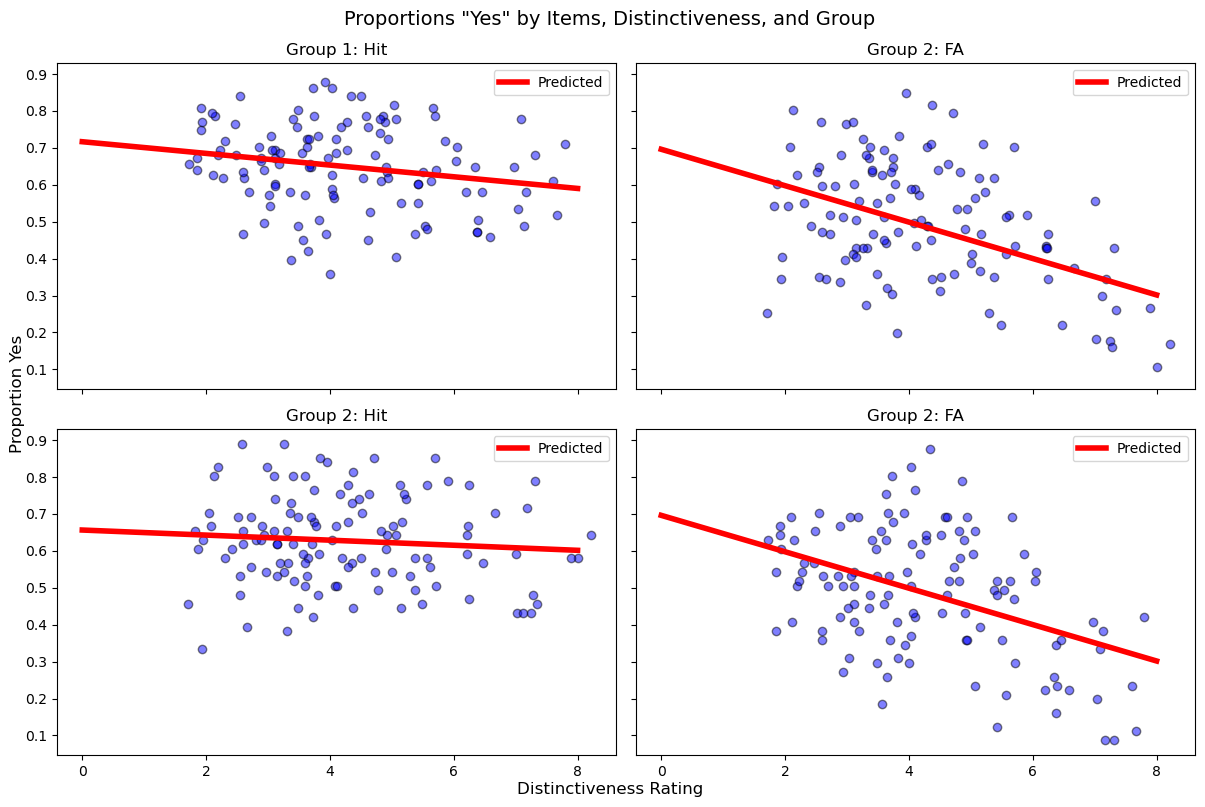

In [60]:
# Make two facets side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
axes = axes.ravel()  # flatten to 1D array

# Subset the data
hit_data1 = df_by_item[(df_by_item["resp_type"] == "Hit") & (df_by_item["group"] == "Group1")]
fa_data1  = df_by_item[(df_by_item["resp_type"] == "FA") & (df_by_item["group"] == "Group1")]
hit_data2 = df_by_item[(df_by_item["resp_type"] == "Hit") & (df_by_item["group"] == "Group2")]
fa_data2  = df_by_item[(df_by_item["resp_type"] == "FA") & (df_by_item["group"] == "Group2")]


# Scatter plots
axes[0].scatter(hit_data1["distinct_rating"], hit_data1["prop_yes"], alpha=0.5, edgecolor="k", color="blue")
axes[1].scatter(fa_data1["distinct_rating"], fa_data1["prop_yes"], alpha=0.5, edgecolor="k", color="blue")
axes[2].scatter(hit_data2["distinct_rating"], hit_data2["prop_yes"], alpha=0.5, edgecolor="k", color="blue")
axes[3].scatter(fa_data2["distinct_rating"], fa_data2["prop_yes"], alpha=0.5, edgecolor="k", color="blue")


for ax, data in zip(
    axes, 
    [hit_data1, fa_data2, hit_data2, fa_data2]
    ):
    
    X = pd.DataFrame({
        "resp_type": np.repeat(data['resp_type'].unique(), 9),       # repeat each category,
        "group": np.repeat( data['group'].unique(), 9 ),
        "distinct_rating": list(range(0, 9)) # 0–8 for each category
        })
    y = m1_by_group.predict(X)
    
    ax.plot(X["distinct_rating"], y, color="red", linewidth=4, label="Predicted")
    gr = ''.join([c for c in data['group'].unique()[0] if c.isdigit()])
    resp_type = data['resp_type'].unique()[0]
    title = f"Group {gr}: {resp_type}"
    ax.set_title(title)
    ax.legend()

# Labels
fig.text(0.5, 0, "Distinctiveness Rating", ha="center", fontsize=12)
fig.text(0, 0.5, "Proportion Yes", va="center", rotation="vertical", fontsize=12)
fig.suptitle('Proportions "Yes" by Items, Distinctiveness, and Group', fontsize=14)

plt.tight_layout()
plt.show()

In [61]:
# largest and smallest differences
diff = df_by_item_wide['Hit'] - df_by_item_wide['FA']
pd.merge(
    (df_by_item_wide
        .loc[(diff == diff.max()) | (diff == diff.min())]
        .assign(diff=diff)
        .reset_index()
        ), 
    (df_by_item
     .loc[:,['image_id','distinct_rating','category_name']]
     .drop_duplicates()), 
    on='image_id'
)


,image_id,FA,Hit,diff,distinct_rating,category_name
0,21,0.648855,0.530864,-0.117991,2.55,Basalt
1,85,0.086420,0.679389,0.592970,7.32,Obsidian


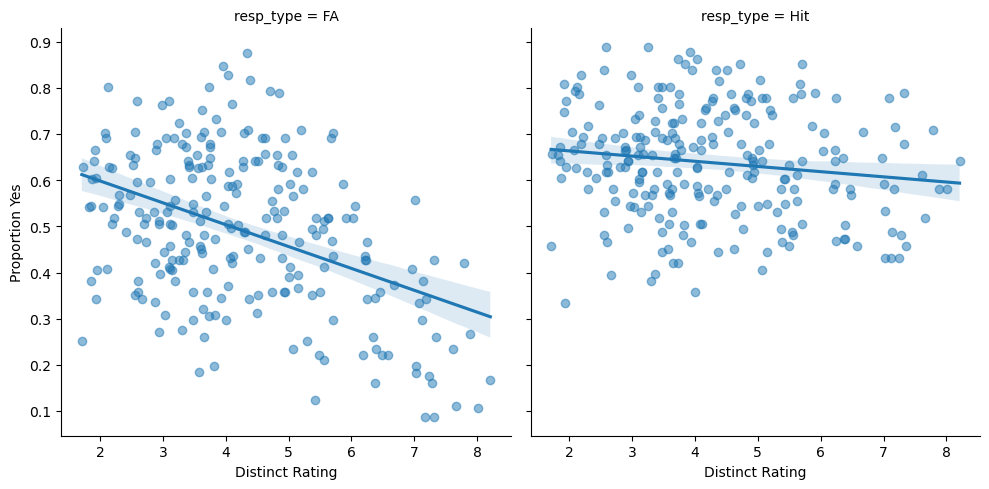

In [62]:
g = sns.lmplot(
    data=df_by_item,
    x="distinct_rating", 
    y="prop_yes",
    col="resp_type",       # facets
    logistic=False,        # keep it linear
    scatter_kws={"alpha":0.5}
)

g.set_axis_labels("Distinct Rating", "Proportion Yes")
plt.show()

# Split-half

In [63]:
# add response types to filtered_data_test
conditions = [
    (filtered_data_test['item_type'] == 'Target') & (filtered_data_test['cor_ans'] == True),
    (filtered_data_test['item_type'] == 'Target') & (filtered_data_test['cor_ans'] == False),
    (filtered_data_test['item_type'] == 'Foil') & (filtered_data_test['cor_ans'] == True),
    (filtered_data_test['item_type'] == 'Foil') & (filtered_data_test['cor_ans'] == False),
]

choices = ['Hit', 'Miss', 'CR', 'FA']

filtered_data_test['resp_type'] = np.select(conditions, choices, default=np.nan)
filtered_data_test

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating,good_subj,resp_type
0,248,90229,Group2,test_phase,Target,a,l,False,4494.0,Gabbro,4,I,I_Gabbro_06.png,54,3.26,True,Miss
1,250,90229,Group2,test_phase,Target,l,l,True,1738.0,Rock Salt,28,S,S_Rock Salt_01.png,433,7.18,True,Hit
2,252,90229,Group2,test_phase,Target,l,l,True,1053.0,Obsidian,6,I,I_Obsidian_06.png,86,8.01,True,Hit
3,254,90229,Group2,test_phase,Target,l,l,True,3124.0,Granite,5,I,I_Granite_03.png,67,3.60,True,Hit
4,256,90229,Group2,test_phase,Foil,a,a,True,4779.0,Dolomite,25,S,S_Dolomite_09.png,393,2.11,True,CR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126715,718,88397,Group1,test_phase,Foil,a,a,True,832.0,Pumice,9,I,I_Pumice_16.png,144,5.37,True,CR
126716,720,88397,Group1,test_phase,Foil,a,a,True,867.0,Peridotite,8,I,I_Peridotite_08.png,120,4.77,True,CR
126717,722,88397,Group1,test_phase,Target,l,l,True,1092.0,Rock Salt,28,S,S_Rock Salt_15.png,447,7.79,True,Hit
126718,724,88397,Group1,test_phase,Target,l,l,True,2384.0,Granite,5,I,I_Granite_06.png,70,3.73,True,Hit


In [64]:
# ---------- Hits data for split-half reliability analysis ----------


# ---------- Group 1 ----------

sh_df_hits_gr1_long = (
    (filtered_data_test.loc[(filtered_data_test['group']=='Group1') & (filtered_data_test['item_type']=='Target'), 
                            ['subject_id','group','image_id','resp_type', 'item_type']])
    .copy()
    )
sh_df_hits_gr1_long['is_hit'] = np.where(sh_df_hits_gr1_long['resp_type']=='Hit', 1, 0)  
sh_df_hits_gr1_long = sh_df_hits_gr1_long[['subject_id', 'image_id', 'is_hit']]  
# pivot a table wider
sh_df_hits_gr1 = sh_df_hits_gr1_long.pivot(index='image_id', columns='subject_id', values='is_hit')


# ---------- Group 2 ----------

sh_df_hits_gr2_long = (
    (filtered_data_test.loc[(filtered_data_test['group']=='Group2') & (filtered_data_test['item_type']=='Target'), 
                            ['subject_id','group','image_id','resp_type', 'item_type']])
    .copy()
    )
sh_df_hits_gr2_long['is_hit'] = np.where(sh_df_hits_gr2_long['resp_type']=='Hit', 1, 0)  
sh_df_hits_gr2_long = sh_df_hits_gr2_long[['subject_id', 'image_id', 'is_hit']]  
# pivot a table wider
sh_df_hits_gr2 = sh_df_hits_gr2_long.pivot(index='image_id', columns='subject_id', values='is_hit')

In [65]:
# ---------- FA data for split-half reliability analysis ----------


# ---------- Group 1 ----------

sh_df_fa_gr1_long = (
    (filtered_data_test.loc[(filtered_data_test['group']=='Group1') & (filtered_data_test['item_type']=='Foil'), 
                            ['subject_id','group','image_id','resp_type', 'item_type']])
    .copy()
    )
sh_df_fa_gr1_long['is_fa'] = np.where(sh_df_fa_gr1_long['resp_type']=='FA', 1, 0)  
sh_df_fa_gr1_long
sh_df_fa_gr1_long = sh_df_fa_gr1_long[['subject_id', 'image_id', 'is_fa']]  
# # pivot a table wider
sh_df_fa_gr1 = sh_df_fa_gr1_long.pivot(index='image_id', columns='subject_id', values='is_fa')


# ---------- Group 2 ----------

sh_df_fa_gr2_long = (
    (filtered_data_test.loc[(filtered_data_test['group']=='Group2') & (filtered_data_test['item_type']=='Foil'), 
                            ['subject_id','group','image_id','resp_type', 'item_type']])
    .copy()
    )
sh_df_fa_gr2_long['is_fa'] = np.where(sh_df_fa_gr2_long['resp_type']=='FA', 1, 0)  
sh_df_fa_gr2_long = sh_df_fa_gr2_long[['subject_id', 'image_id', 'is_fa']]  
# pivot a table wider
sh_df_fa_gr2 = sh_df_fa_gr2_long.pivot(index='image_id', columns='subject_id', values='is_fa')

In [66]:
# Loop over Hits
n_iterations = 10000
sh_corrs_hits = []
np.random.seed(1)  # For reproducibility
for i in range(n_iterations):
    
    # Track progress
    if i % 500 == 0:
        print(f"Iteration {i}")
    elif i == n_iterations - 1:
        print("Finished!")
        
    # Group 1
    # Shuffle columns (subjects)
    shuffled_cols_1 = np.random.permutation(sh_df_hits_gr1.columns)
    shuffled_df_1 = sh_df_hits_gr1[shuffled_cols_1]
    
    # Split into two halves
    mid_point_1 = len(shuffled_df_1.columns) // 2
    first_half_1 = shuffled_df_1.iloc[:, :mid_point_1]
    second_half_1 = shuffled_df_1.iloc[:, mid_point_1:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_1 = first_half_1.mean(axis=1)
    mean_second_half_1 = second_half_1.mean(axis=1)
    
    # Group 2
    # Shuffle columns (subjects)
    shuffled_cols_2 = np.random.permutation(sh_df_hits_gr2.columns)
    shuffled_df_2 = sh_df_hits_gr2[shuffled_cols_2]
    
    # Split into two halves
    mid_point_2 = len(shuffled_df_2.columns) // 2
    first_half_2 = shuffled_df_2.iloc[:, :mid_point_2]
    second_half_2 = shuffled_df_2.iloc[:, mid_point_2:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_2 = first_half_2.mean(axis=1)
    mean_second_half_2 = second_half_2.mean(axis=1)
    
    # Combine groups
    mean_first_half = pd.concat([mean_first_half_1, mean_first_half_2], axis=0)
    mean_second_half = pd.concat([mean_second_half_1, mean_second_half_2], axis=0)
    
    # Spearman correlation with Spearman-Brown correction
    # (np) / (1 + (n-1)p) = 2p / (1 + p) in our case (2 tests, p - current reliability)
    spearman_corr, _ = stats.spearmanr(mean_first_half, mean_second_half)
    sb_corr = (2 * spearman_corr) / (1 + spearman_corr)
    
    sh_corrs_hits.append(sb_corr)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Finished!


In [67]:
# Loop over Hits randomly
n_iterations = 10000
sh_corrs_hits_random = []
np.random.seed(1)  # For reproducibility
for i in range(n_iterations):
    
    # Track progress
    if i % 500 == 0:
        print(f"Iteration {i}")
    elif i == n_iterations - 1:
        print("Finished!")
        
    # Group 1
    # Shuffle columns (subjects)
    shuffled_cols_1 = np.random.permutation(sh_df_hits_gr1.columns)
    shuffled_df_1 = sh_df_hits_gr1[shuffled_cols_1]
    
    # Split into two halves
    mid_point_1 = len(shuffled_df_1.columns) // 2
    first_half_1 = shuffled_df_1.iloc[:, :mid_point_1]
    second_half_1 = shuffled_df_1.iloc[:, mid_point_1:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_1 = first_half_1.mean(axis=1)
    mean_second_half_1 = second_half_1.mean(axis=1)
    
    # Group 2
    # Shuffle columns (subjects)
    shuffled_cols_2 = np.random.permutation(sh_df_hits_gr2.columns)
    shuffled_df_2 = sh_df_hits_gr2[shuffled_cols_2]
    
    # Split into two halves
    mid_point_2 = len(shuffled_df_2.columns) // 2
    first_half_2 = shuffled_df_2.iloc[:, :mid_point_2]
    second_half_2 = shuffled_df_2.iloc[:, mid_point_2:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_2 = first_half_2.mean(axis=1)
    mean_second_half_2 = second_half_2.mean(axis=1)
    
    # Combine groups
    mean_first_half = pd.concat([mean_first_half_1, mean_first_half_2], axis=0)
    mean_second_half = pd.concat([mean_second_half_1, mean_second_half_2], axis=0)
    
    # Randomly shuffle one half to break any real association
    mean_second_half = mean_second_half.sample(frac=1)
    
    # Spearman correlation with Spearman-Brown correction
    # (np) / (1 + (n-1)p) = 2p / (1 + p) in our case (2 tests, p - current reliability)
    spearman_corr, _ = stats.spearmanr(mean_first_half, mean_second_half)
    sb_corr = (2 * spearman_corr) / (1 + spearman_corr)
    
    sh_corrs_hits_random.append(sb_corr)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Finished!


In [68]:
# Loop over FAs
n_iterations = 10000
sh_corrs_fa = []
np.random.seed(1)  # For reproducibility
for i in range(n_iterations):
    
    # Track progress
    if i % 500 == 0:
        print(f"Iteration {i}")
    elif i == n_iterations - 1:
        print("Finished!")
        
    # Group 1
    # Shuffle columns (subjects)
    shuffled_cols_1 = np.random.permutation(sh_df_fa_gr1.columns)
    shuffled_df_1 = sh_df_fa_gr1[shuffled_cols_1]
    
    # Split into two halves
    mid_point_1 = len(shuffled_df_1.columns) // 2
    first_half_1 = shuffled_df_1.iloc[:, :mid_point_1]
    second_half_1 = shuffled_df_1.iloc[:, mid_point_1:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_1 = first_half_1.mean(axis=1)
    mean_second_half_1 = second_half_1.mean(axis=1)
    
    # Group 2
    # Shuffle columns (subjects)
    shuffled_cols_2 = np.random.permutation(sh_df_fa_gr2.columns)
    shuffled_df_2 = sh_df_fa_gr2[shuffled_cols_2]
    
    # Split into two halves
    mid_point_2 = len(shuffled_df_2.columns) // 2
    first_half_2 = shuffled_df_2.iloc[:, :mid_point_2]
    second_half_2 = shuffled_df_2.iloc[:, mid_point_2:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_2 = first_half_2.mean(axis=1)
    mean_second_half_2 = second_half_2.mean(axis=1)
    
    # Combine groups
    mean_first_half = pd.concat([mean_first_half_1, mean_first_half_2], axis=0)
    mean_second_half = pd.concat([mean_second_half_1, mean_second_half_2], axis=0)
    
    # Spearman correlation with Spearman-Brown correction
    # (np) / (1 + (n-1)p) = 2p / (1 + p) in our case (2 tests, p - current reliability)
    spearman_corr, _ = stats.spearmanr(mean_first_half, mean_second_half)
    sb_corr = (2 * spearman_corr) / (1 + spearman_corr)
    
    sh_corrs_fa.append(sb_corr)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Finished!


In [69]:
# Loop over FAs randomly
n_iterations = 10000
sh_corrs_fa_random = []
np.random.seed(1)  # For reproducibility
for i in range(n_iterations):
    
    # Track progress
    if i % 500 == 0:
        print(f"Iteration {i}")
    elif i == n_iterations - 1:
        print("Finished!")
        
    # Group 1
    # Shuffle columns (subjects)
    shuffled_cols_1 = np.random.permutation(sh_df_fa_gr1.columns)
    shuffled_df_1 = sh_df_fa_gr1[shuffled_cols_1]
    
    # Split into two halves
    mid_point_1 = len(shuffled_df_1.columns) // 2
    first_half_1 = shuffled_df_1.iloc[:, :mid_point_1]
    second_half_1 = shuffled_df_1.iloc[:, mid_point_1:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_1 = first_half_1.mean(axis=1)
    mean_second_half_1 = second_half_1.mean(axis=1)
    
    # Group 2
    # Shuffle columns (subjects)
    shuffled_cols_2 = np.random.permutation(sh_df_fa_gr2.columns)
    shuffled_df_2 = sh_df_fa_gr2[shuffled_cols_2]
    
    # Split into two halves
    mid_point_2 = len(shuffled_df_2.columns) // 2
    first_half_2 = shuffled_df_2.iloc[:, :mid_point_2]
    second_half_2 = shuffled_df_2.iloc[:, mid_point_2:]
    
    # Compute mean hit rates for each item in both halves
    mean_first_half_2 = first_half_2.mean(axis=1)
    mean_second_half_2 = second_half_2.mean(axis=1)
    
    # Combine groups
    mean_first_half = pd.concat([mean_first_half_1, mean_first_half_2], axis=0)
    mean_second_half = pd.concat([mean_second_half_1, mean_second_half_2], axis=0)
    
    # Randomly shuffle one half to break any real association
    mean_second_half = mean_second_half.sample(frac=1)
    
    # Spearman correlation with Spearman-Brown correction
    # (np) / (1 + (n-1)p) = 2p / (1 + p) in our case (2 tests, p - current reliability)
    spearman_corr, _ = stats.spearmanr(mean_first_half, mean_second_half)
    sb_corr = (2 * spearman_corr) / (1 + spearman_corr)
    
    sh_corrs_fa_random.append(sb_corr)

Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Finished!


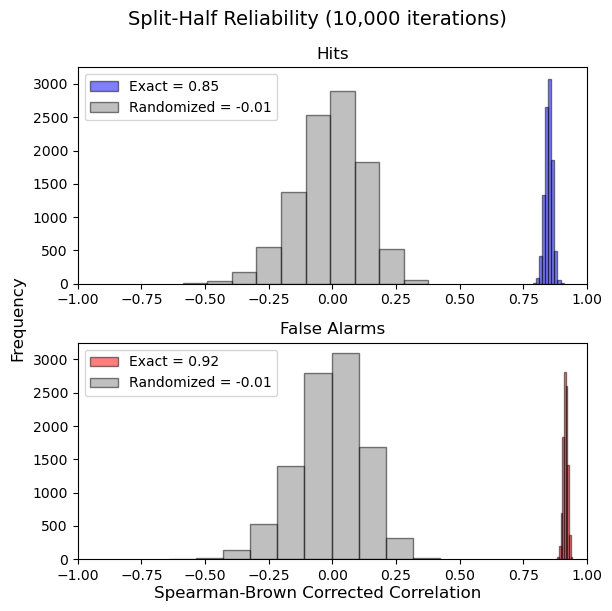

In [70]:
n_bins = 10

fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True,sharey=True)

# Hits
axes[0].hist(sh_corrs_hits, color='blue', alpha=0.5, edgecolor='black', 
             label=f'Exact = {np.mean(sh_corrs_hits):.2f}',
             bins=n_bins)
#axes[0].axvline(np.mean(sh_corrs_hits), color='black', linestyle='dashed', linewidth=2)
                #label=f'Mean Hits = {np.mean(sh_corrs_hits):.3f}')
axes[0].hist(sh_corrs_hits_random, color='gray', alpha=0.5, edgecolor='black', 
             label=f'Randomized = {np.mean(sh_corrs_hits_random):.2f}', 
             bins=n_bins)
#axes[0].axvline(np.mean(sh_corrs_hits_random), color='black', linestyle='dashed', linewidth=2)
                #label=f'Mean Randomized = {np.mean(sh_corrs_hits_random):.3f}')
axes[0].tick_params(labelbottom=True) # show x labels only on the upper plot
axes[0].set_title('Hits')
#axes[0].set_ylabel("Frequency")
axes[0].legend()

# FAs
axes[1].hist(sh_corrs_fa, color='red', alpha=0.5, edgecolor='black', 
             label=f'Exact = {np.mean(sh_corrs_fa):.2f}',
             bins=n_bins)
#axes[1].axvline(np.mean(sh_corrs_fa), color='black', linestyle='dashed', linewidth=2)
                #label=f'Mean FAs = {np.mean(sh_corrs_fa):.3f}')
axes[1].hist(sh_corrs_fa_random, color='gray', alpha=0.5, edgecolor='black', 
             label=f'Randomized = {np.mean(sh_corrs_fa_random):.2f}', 
             bins=n_bins)
#axes[1].axvline(np.mean(sh_corrs_fa_random), color='black', linestyle='dashed', linewidth=2)
                #label=f'Mean Randomized = {np.mean(sh_corrs_fa_random):.3f}')
axes[1].set_title('False Alarms')
#axes[1].set_xlabel("Spearman-Brown Corrected Correlation")
axes[1].legend()

plt.xlim(-1, 1)
fig.text(0.5, 0, 'Spearman-Brown Corrected Correlation', ha='center', fontsize=12)
fig.text(0, 0.4, 'Frequency', ha='center', fontsize=12, rotation='vertical')
plt.suptitle("Split-Half Reliability (10,000 iterations)", fontsize=14)
plt.tight_layout()
plt.show()

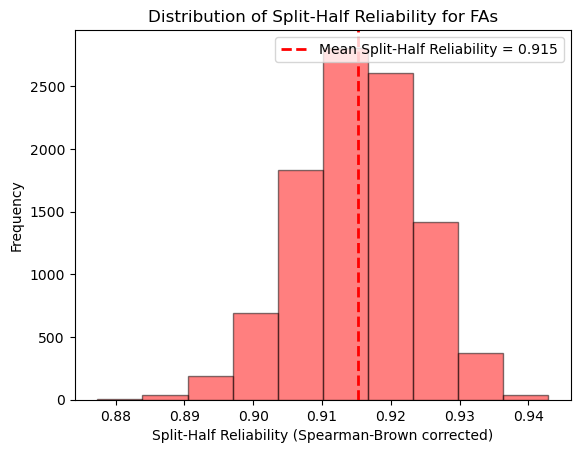

In [71]:
plt.figsize = (12, 6)
plt.hist(sh_corrs_fa, bins=10, edgecolor="black", alpha=0.5, color='red')
plt.axvline(np.mean(sh_corrs_fa), color='red', linestyle='dashed', linewidth=2, label=f'Mean Split-Half Reliability = {np.mean(sh_corrs_fa):.3f}')
plt.xlabel("Split-Half Reliability (Spearman-Brown corrected)")
plt.ylabel("Frequency")
plt.title("Distribution of Split-Half Reliability for FAs")
plt.legend()
plt.show()

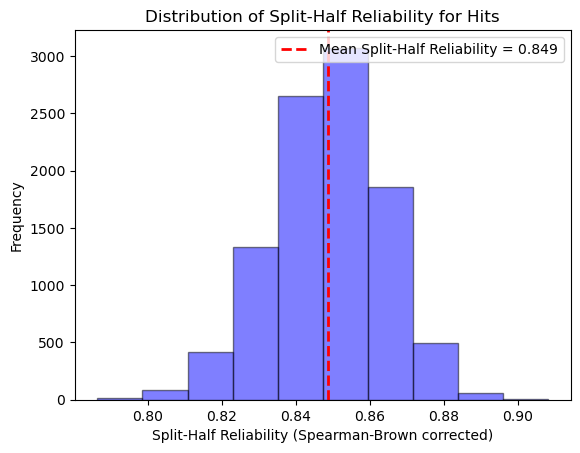

In [72]:
plt.figsize = (12, 6)
plt.hist(sh_corrs_hits, bins=10, edgecolor="black", alpha=0.5, color='blue')
plt.axvline(np.mean(sh_corrs_hits), color='red', linestyle='dashed', linewidth=2, label=f'Mean Split-Half Reliability = {np.mean(sh_corrs_hits):.3f}')
plt.xlabel("Split-Half Reliability (Spearman-Brown corrected)")
plt.ylabel("Frequency")
plt.title("Distribution of Split-Half Reliability for Hits")
plt.legend()
plt.show()

# Hit vs FA Correlations by Distinctiveness 

In [73]:
df_by_item_wide = (df_by_item[['image_id','category_name',
                                'distinct_rating','prop_yes',
                                'resp_type']]
                    .pivot(index = ['image_id', 'category_name', 'distinct_rating'], 
                            columns='resp_type', values='prop_yes')
                    .reset_index()
                    )
df_by_item_wide

resp_type,image_id,category_name,distinct_rating,FA,Hit
0,2,Andesite,3.93,0.345679,0.465649
1,5,Andesite,3.32,0.427481,0.567901
2,6,Andesite,3.17,0.691358,0.656489
3,7,Andesite,4.81,0.518519,0.740458
4,10,Andesite,3.15,0.427481,0.617284
...,...,...,...,...,...
235,471,Shale,2.73,0.519084,0.691358
236,472,Shale,2.55,0.351145,0.481481
237,474,Shale,1.91,0.641975,0.809160
238,475,Shale,4.05,0.617284,0.572519


In [74]:
q25, q75 = df_by_item_wide['distinct_rating'].quantile([0.25, 0.75])
df_by_item_wide['distinct_group'] = df_by_item_wide['distinct_rating'].map(lambda x: 
    'Top' if x >= q75 else ('Bottom' if x <= q25 else 'Middle')
    )
df_by_item_wide

resp_type,image_id,category_name,distinct_rating,FA,Hit,distinct_group
0,2,Andesite,3.93,0.345679,0.465649,Middle
1,5,Andesite,3.32,0.427481,0.567901,Middle
2,6,Andesite,3.17,0.691358,0.656489,Middle
3,7,Andesite,4.81,0.518519,0.740458,Middle
4,10,Andesite,3.15,0.427481,0.617284,Middle
...,...,...,...,...,...,...
235,471,Shale,2.73,0.519084,0.691358,Bottom
236,472,Shale,2.55,0.351145,0.481481,Bottom
237,474,Shale,1.91,0.641975,0.809160,Bottom
238,475,Shale,4.05,0.617284,0.572519,Middle


In [75]:
# for a larger version of the plot
df_by_item['distinct_group'] = df_by_item['distinct_rating'].map(lambda x: 
    'Top' if x >= q75 else ('Bottom' if x <= q25 else 'Middle')
    )
df_by_item

,image_id,group,n_subj,n_yes,item_type,category_name,distinct_rating,prop_yes,resp_type,distinct_group
0,2,Group1,131,61,Target,Andesite,3.93,0.465649,Hit,Middle
1,2,Group2,81,28,Foil,Andesite,3.93,0.345679,FA,Middle
2,5,Group1,131,56,Foil,Andesite,3.32,0.427481,FA,Middle
3,5,Group2,81,46,Target,Andesite,3.32,0.567901,Hit,Middle
4,6,Group1,131,86,Target,Andesite,3.17,0.656489,Hit,Middle
...,...,...,...,...,...,...,...,...,...,...
475,474,Group2,81,52,Foil,Shale,1.91,0.641975,FA,Bottom
476,475,Group1,131,75,Target,Shale,4.05,0.572519,Hit,Middle
477,475,Group2,81,50,Foil,Shale,4.05,0.617284,FA,Middle
478,476,Group1,131,89,Target,Shale,2.48,0.679389,Hit,Bottom


In [76]:
# Convert categorical to string, then create composite column
df_by_item['resp_group'] = df_by_item['resp_type'].astype(str) + '_' + df_by_item['group'].astype(str)

# Then pivot using this new column, including distinct_group in the index
df_by_item_wide = (df_by_item[['image_id', 'category_name', 
                                'distinct_rating', 'distinct_group',
                                'prop_yes', 'resp_group']]
                    .pivot(index=['image_id', 'category_name', 'distinct_rating', 'distinct_group'], 
                           columns='resp_group', 
                           values='prop_yes')
                    .reset_index()
                    )

df_by_item_wide

resp_group,image_id,category_name,distinct_rating,distinct_group,FA_Group1,FA_Group2,Hit_Group1,Hit_Group2
0,2,Andesite,3.93,Middle,NaN,0.345679,0.465649,NaN
1,5,Andesite,3.32,Middle,0.427481,NaN,NaN,0.567901
2,6,Andesite,3.17,Middle,NaN,0.691358,0.656489,NaN
3,7,Andesite,4.81,Middle,NaN,0.518519,0.740458,NaN
4,10,Andesite,3.15,Middle,0.427481,NaN,NaN,0.617284
...,...,...,...,...,...,...,...,...
235,471,Shale,2.73,Bottom,0.519084,NaN,NaN,0.691358
236,472,Shale,2.55,Bottom,0.351145,NaN,NaN,0.481481
237,474,Shale,1.91,Bottom,NaN,0.641975,0.809160,NaN
238,475,Shale,4.05,Middle,NaN,0.617284,0.572519,NaN


In [53]:
# corrs = df_by_item_wide.groupby(['distinct_group'], observed=True)[['Hit','FA']].apply(
#     lambda x: pd.Series(stats.pearsonr(x['Hit'], x['FA']), index=['r','p_value'])
#     ).reset_index()
# corr_map = corrs.set_index("distinct_group")[["r","p_value"]].to_dict(orient="index") # for plotting
# corrs

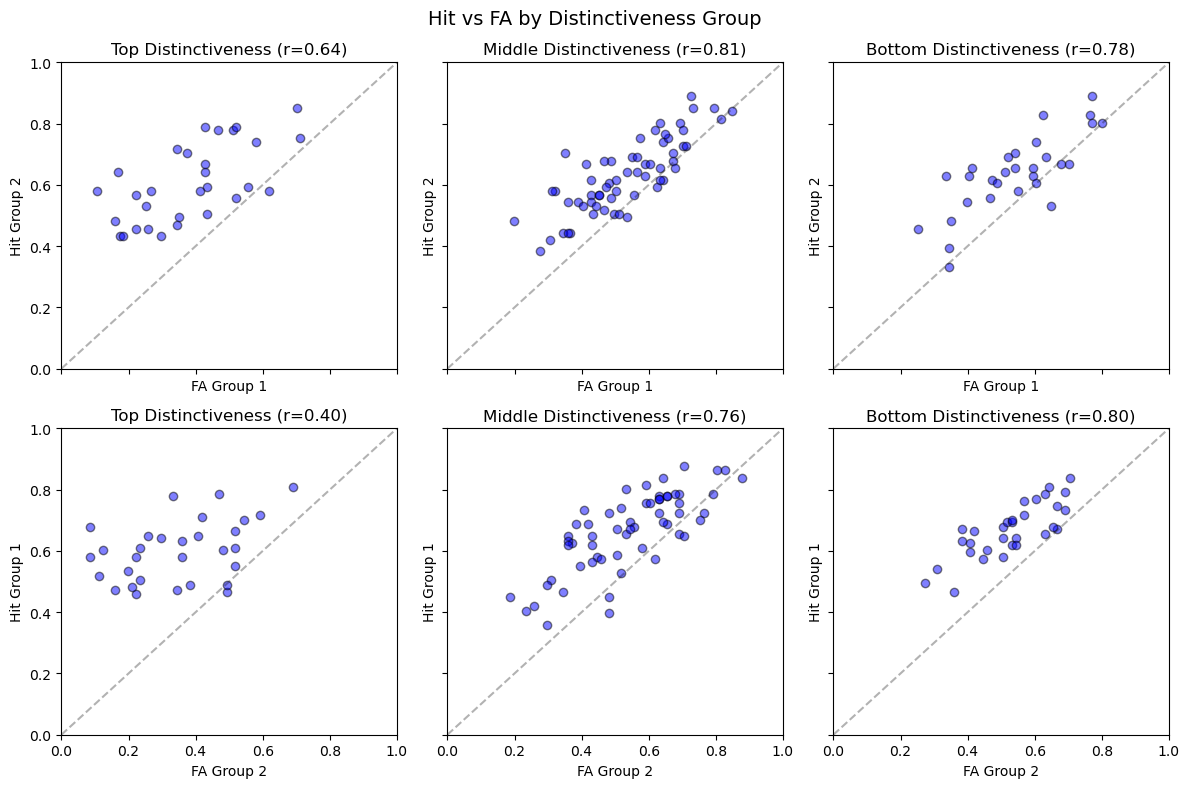

In [77]:
# Hit vs FA by Distinctiveness Group

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True, sharex=True)
axes = axes.ravel()  # flatten to 1D array

# Subplot 0 - Top
x0 = df_by_item.loc[(df_by_item['distinct_group']=='Top') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y0 = df_by_item.loc[(df_by_item['distinct_group']=='Top') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[0].scatter(x0, y0, alpha=0.5, edgecolor="k", color="blue")
axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask0 = ~(x0.isna() | y0.isna())
r0 = x0[mask0].corr(y0[mask0])
axes[0].set_xlabel('FA Group 1')
axes[0].set_ylabel('Hit Group 2')
axes[0].set_title(f'Top Distinctiveness (r={r0:.2f})')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

# Subplot 1 - Middle
x1 = df_by_item.loc[(df_by_item['distinct_group']=='Middle') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y1 = df_by_item.loc[(df_by_item['distinct_group']=='Middle') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[1].scatter(x1, y1, alpha=0.5, edgecolor="k", color="blue")
axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask1 = ~(x1.isna() | y1.isna())
r1 = x1[mask1].corr(y1[mask1])
axes[1].set_xlabel('FA Group 1')
axes[1].set_ylabel('Hit Group 2')
axes[1].set_title(f'Middle Distinctiveness (r={r1:.2f})')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)

# Subplot 2 - Bottom
x2 = df_by_item.loc[(df_by_item['distinct_group']=='Bottom') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y2 = df_by_item.loc[(df_by_item['distinct_group']=='Bottom') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[2].scatter(x2, y2, alpha=0.5, edgecolor="k", color="blue")
axes[2].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask2 = ~(x2.isna() | y2.isna())
r2 = x2[mask2].corr(y2[mask2])
axes[2].set_xlabel('FA Group 1')
axes[2].set_ylabel('Hit Group 2')
axes[2].set_title(f'Bottom Distinctiveness (r={r2:.2f})')
axes[2].set_xlim(0, 1)
axes[2].set_ylim(0, 1)

# Subplot 3 - Top
x3 = df_by_item.loc[(df_by_item['distinct_group']=='Top') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y3 = df_by_item.loc[(df_by_item['distinct_group']=='Top') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[3].scatter(x3, y3, alpha=0.5, edgecolor="k", color="blue")
axes[3].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask3 = ~(x3.isna() | y3.isna())
r3 = x3[mask3].corr(y3[mask3])
axes[3].set_xlabel('FA Group 2')
axes[3].set_ylabel('Hit Group 1')
axes[3].set_title(f'Top Distinctiveness (r={r3:.2f})')
axes[3].set_xlim(0, 1)
axes[3].set_ylim(0, 1)

# Subplot 4 - Middle
x4 = df_by_item.loc[(df_by_item['distinct_group']=='Middle') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y4 = df_by_item.loc[(df_by_item['distinct_group']=='Middle') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[4].scatter(x4, y4, alpha=0.5, edgecolor="k", color="blue")
axes[4].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask4 = ~(x4.isna() | y4.isna())
r4 = x4[mask4].corr(y4[mask4])
axes[4].set_xlabel('FA Group 2')
axes[4].set_ylabel('Hit Group 1')
axes[4].set_title(f'Middle Distinctiveness (r={r4:.2f})')
axes[4].set_xlim(0, 1)
axes[4].set_ylim(0, 1)

# Subplot 5 - Bottom
x5 = df_by_item.loc[(df_by_item['distinct_group']=='Bottom') & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
y5 = df_by_item.loc[(df_by_item['distinct_group']=='Bottom') & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
axes[5].scatter(x5, y5, alpha=0.5, edgecolor="k", color="blue")
axes[5].plot([0, 1], [0, 1], 'k--', alpha=0.3)
mask5 = ~(x5.isna() | y5.isna())
r5 = x5[mask5].corr(y5[mask5])
axes[5].set_xlabel('FA Group 2')
axes[5].set_ylabel('Hit Group 1')
axes[5].set_title(f'Bottom Distinctiveness (r={r5:.2f})')
axes[5].set_xlim(0, 1)
axes[5].set_ylim(0, 1)

plt.suptitle('Hit vs FA by Distinctiveness Group', fontsize=14)
plt.tight_layout()
plt.show()

In [78]:
# Highly distinctive items
pd.merge(df_by_item.loc[df_by_item['distinct_group']=='Top',['image_id','category_name']],
         filtered_data_test.loc[filtered_data_test['item_type']=='Target',['image_id','image_png']].drop_duplicates(),
         on='image_id'
        ).drop_duplicates().sort_values(by='image_png')

,image_id,category_name,image_png
0,65,Granite,I_Granite_01.png
2,73,Granite,I_Granite_09.png
4,82,Obsidian,I_Obsidian_02.png
6,84,Obsidian,I_Obsidian_04.png
8,85,Obsidian,I_Obsidian_05.png
10,86,Obsidian,I_Obsidian_06.png
12,92,Obsidian,I_Obsidian_12.png
14,95,Obsidian,I_Obsidian_15.png
16,99,Pegmatite,I_Pegmatite_03.png
18,101,Pegmatite,I_Pegmatite_05.png


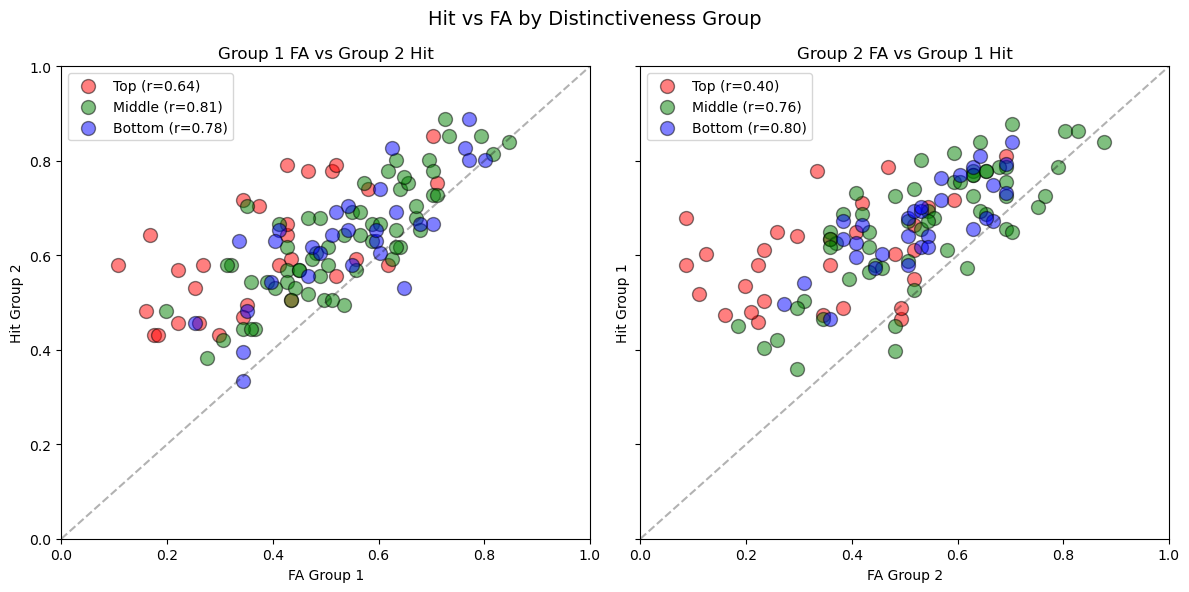

In [79]:
# Same plot but all in one with legend

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
axes = axes.ravel()  # flatten to 1D array

distinct_groups = ['Top', 'Middle', 'Bottom']
colors = ['red', 'green', 'blue']

for color, distinct in zip(colors, distinct_groups):
    
    x = df_by_item.loc[(df_by_item['distinct_group']==distinct) & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
    y = df_by_item.loc[(df_by_item['distinct_group']==distinct) & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
    # add correlation for this distinctiveness group
    mask = ~(x.isna() | y.isna())
    r = x[mask].corr(y[mask])
    axes[0].scatter(x, y, alpha=0.5, edgecolor="k", color = color, s = 100,
                    label=f"{distinct} (r={r:.2f})")
   
    
    x_rev = df_by_item.loc[(df_by_item['distinct_group']==distinct) & (df_by_item['group']=='Group2') & (df_by_item['resp_type']=='FA'), 'prop_yes'].reset_index(drop=True)
    y_rev = df_by_item.loc[(df_by_item['distinct_group']==distinct) & (df_by_item['group']=='Group1') & (df_by_item['resp_type']=='Hit'), 'prop_yes'].reset_index(drop=True)
    # add correlation for this distinctiveness group
    mask_rev = ~(x_rev.isna() | y_rev.isna())
    r_rev = x_rev[mask_rev].corr(y_rev[mask_rev])
    axes[1].scatter(x_rev, y_rev, alpha=0.5, edgecolor="k",color = color, s = 100,
                    label=f"{distinct} (r={r_rev:.2f})")

axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.3)
axes[0].set_xlabel('FA Group 1')
axes[0].set_ylabel('Hit Group 2')
axes[0].set_title('Group 1 FA vs Group 2 Hit')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].legend()

axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.3)
axes[1].set_xlabel('FA Group 2')
axes[1].set_ylabel('Hit Group 1')
axes[1].set_title('Group 2 FA vs Group 1 Hit')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].legend()

plt.suptitle('Hit vs FA by Distinctiveness Group', fontsize=14)
plt.tight_layout()
plt.show()

In [57]:
# # Wrong plot

# g = sns.lmplot(
#     data=df_by_item_wide,
#     y="Hit", 
#     x="FA",
#     col="distinct_group",
#     col_order=['Top','Middle','Bottom'],
#     hue='distinct_group',
#     palette={'Top':'blue', 'Middle':'green', 'Bottom':'red'},
#     logistic=False,
#     scatter_kws={"alpha":0.5},
#     height=4, aspect=1
# )

# g.set_axis_labels("False Alarm", "Hit")
# g.fig.suptitle("Correlation of Hits and False Alarms\nby Distinctiveness Rating Group", fontsize=16)
# # Adjust spacing so the title doesn't overlap facets
# g.fig.subplots_adjust(top=0.78)

# # set facet titles
# g.set_titles("{col_name}")  # show clean facet titles
# custom_titles = {
#     "Top": "Top (q ≥ 0.75)",
#     "Middle": "Middle (0.25 < q < 0.75)",
#     "Bottom": "Bottom (q ≤ 0.25)"
# }

# # add correlations
# for perf_key, ax in g.axes_dict.items():
#     ax.set_title(custom_titles.get(perf_key, perf_key))
    
#     stats_vals = corr_map.get(perf_key) or corr_map.get(str(perf_key))
#     if stats_vals is None:
#         continue
#     r, p = stats_vals["r"], stats_vals["p_value"]
#     ax.text(
#         0.05, 0.95,
#         f"r = {r:.2f}\np = {p:.3f}",
#         transform=ax.transAxes,
#         ha="left", va="top",
#         fontsize=10,
#         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
#     )

# plt.show()

# Hybrid-Similarity Model

In [82]:
# Load MDS solution
mds_solution = pd.read_csv('MDS8_solution.csv')
mds_solution

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,image_id
0,-2.757,-1.594,1.052,0.768,1.343,1.711,1.795,0.809,1
1,2.001,-0.754,1.405,-1.382,-1.384,0.976,-0.067,1.972,2
2,0.261,-0.508,-2.962,-0.608,0.009,-0.191,2.720,-1.224,3
3,0.382,-0.027,-0.148,-1.899,-1.948,1.862,0.968,0.986,4
4,0.288,2.013,-1.102,-1.285,0.344,-0.009,2.696,-0.174,5
...,...,...,...,...,...,...,...,...,...
475,0.749,-3.021,-1.908,-1.689,-0.493,4.441,-0.122,1.618,476
476,-0.054,-2.743,-1.435,-2.903,0.315,3.161,1.833,1.288,477
477,0.007,-2.077,-4.012,-1.633,-0.366,2.558,4.210,-0.060,478
478,0.177,-2.520,-2.293,-1.216,0.545,0.805,2.302,0.629,479


In [83]:
# study lists
study_list_gr1 = np.sort(filtered_data_memory.loc[filtered_data_memory['group']=='Group1', 'image_id'].unique())
study_list_gr2 = np.sort(filtered_data_memory.loc[filtered_data_memory['group']=='Group2', 'image_id'].unique())

# test list
test_list = np.sort(filtered_data_test['image_id'].unique())

In [84]:
# Calculate distances

# Step 1: Extract the MDS coordinates (first 8 columns)
# Make sure image_id is set as the index for easy lookup
mds_coords = mds_solution.set_index('image_id').iloc[:, :8]

# ------------- Group 1 ----------

# Step 2: Get row and column names from dist_mat_gr1
row_ids = test_list 
col_ids = study_list_gr1

# Step 3: Extract MDS coordinates for rows and columns
# This creates matrices where each row/column corresponds to the image_ids
mds_rows = mds_coords.loc[row_ids].values  # Shape: (240, 8)
mds_cols = mds_coords.loc[col_ids].values  # Shape: (120, 8)

# Step 4: Calculate Euclidean distances efficiently
# Using broadcasting: expand dimensions to compute all pairwise distances at once
# mds_rows[:, np.newaxis, :] has shape (240, 1, 8)
# mds_cols[np.newaxis, :, :] has shape (1, 120, 8)
# The difference has shape (240, 120, 8)
diff = mds_rows[:, np.newaxis, :] - mds_cols[np.newaxis, :, :]

# Calculate Euclidean distance: sqrt of sum of squared differences
distances = np.sqrt(np.sum(diff**2, axis=2))

# Step 5: Create a DataFrame with the same structure as dist_mat_gr1
dist_mat_gr1 = pd.DataFrame(
    distances,
    index=row_ids,
    columns=col_ids
)

# ------------- Group 2 ----------

# Step 2: Get row and column names from dist_mat_gr1
row_ids = test_list 
col_ids = study_list_gr2

# Step 3: Extract MDS coordinates for rows and columns
# This creates matrices where each row/column corresponds to the image_ids
mds_rows = mds_coords.loc[row_ids].values  # Shape: (240, 8)
mds_cols = mds_coords.loc[col_ids].values  # Shape: (120, 8)

# Step 4: Calculate Euclidean distances efficiently
# Using broadcasting: expand dimensions to compute all pairwise distances at once
# mds_rows[:, np.newaxis, :] has shape (240, 1, 8)
# mds_cols[np.newaxis, :, :] has shape (1, 120, 8)
# The difference has shape (240, 120, 8)
diff = mds_rows[:, np.newaxis, :] - mds_cols[np.newaxis, :, :]

# Calculate Euclidean distance: sqrt of sum of squared differences
distances = np.sqrt(np.sum(diff**2, axis=2))

# Step 5: Create a DataFrame with the same structure as dist_mat_gr1
dist_mat_gr2 = pd.DataFrame(
    distances,
    index=row_ids,
    columns=col_ids
)

In `dist_mat_gr1` (240x120) and `dist_mat_gr2` (240x120), each row is each test item (they are the **same** accross two matrices), and each column is each study item (they are **different** accross matrices).

In [85]:
# Calculate similarity matrices

def calculate_similarity_matrix(distance_matrix, c):
    """
    Calculate similarity matrix from distance matrix using exponential decay.
    
    Parameters:
    -----------
    distance_matrix : pd.DataFrame or np.ndarray
        Matrix of distances (240x120)
    c : float
        Decay constant for exponential transformation
    
    Returns:
    --------
    similarity_matrix : pd.DataFrame or np.ndarray
        Matrix of similarities with same shape and index/columns as input
    """
    # Calculate similarity: exp(-c * d_ij)
    similarity = np.exp(-c * distance_matrix)
    
    # If input is DataFrame, preserve index and columns
    if isinstance(distance_matrix, pd.DataFrame):
        similarity_matrix = pd.DataFrame(
            similarity,
            index=distance_matrix.index,
            columns=distance_matrix.columns
        )
    else:
        similarity_matrix = similarity
    
    return similarity_matrix

The similarity matrices are also (240 - test items X 120 - targets) 

In [86]:
# Make a dictionary of distinctiveness (value) by image_id (key)
# [(image_id, distinctiveness), (..., ...)]
distinctiveness_image_id = df_by_item.set_index('image_id')['distinct_rating'].to_dict()
# print first 5 items
list(distinctiveness_image_id.items())[:5]

[(2, 3.93), (5, 3.32), (6, 3.17), (7, 4.81), (10, 3.15)]

In [87]:
def transform_similarity_matrix(alpha, beta, similarity_matrix, distinctiveness_dict = distinctiveness_image_id):
    """
    Transform similarity matrix based on distinctiveness ratings.
    
    Parameters:
    -----------
    similarity_matrix : pd.DataFrame
        Similarity matrix (240x120) with image_ids as index and columns
    distinctiveness_image_id : dict
        Dictionary mapping image_id to distinctiveness rating
    alpha : float
        Free parameter for off-diagonal transformation
    beta : float
        Free parameter for diagonal transformation (where row_id == col_id)
    
    Returns:
    --------
    transformed_matrix : pd.DataFrame
        Transformed similarity matrix with same shape and index/columns
    """
    # Create a copy to avoid modifying the original
    transformed = similarity_matrix.copy()
    
    # Iterate through each row
    for row_id in transformed.index:
        # Get distinctiveness for this row's image
        distinct_i = distinctiveness_dict[row_id]
        
        # Iterate through each column
        for col_id in transformed.columns:
            s_ij = similarity_matrix.loc[row_id, col_id]
            
            if row_id == col_id:
                # Self-similarity case: exp(beta * distinct_i)
                # Since s_ii = 1
                transformed.loc[row_id, col_id] = np.exp(beta * distinct_i)
            else:
                # Similarity between different items (item i and item j) case
                # s_ij * exp(-alpha * distinct_i)
                transformed.loc[row_id, col_id] = np.exp(-alpha * distinct_i) * s_ij
    
    return transformed

`similarity_mat_gr1_transformed` has the same size as the similarity matrix: 240x120

## For each item
(across subjects)

Do NOT run this

In [72]:
def hib_sim_model(parameters, distances_mats_list = [dist_mat_gr1, dist_mat_gr2], distinctiveness_dict = distinctiveness_image_id):
    """
    Hibrid-similarity model to predict P(Old|Item) based on distances in the similarity space and their distinctiveness.
    
    Parameters:
    -----------
    parameters : list or np.ndarray
        List of parameters [c, alpha, beta, k]
    distances_mat : list of pd.DataFrame
        A list of two distance matrices for Group 1 and Group 2 (pd.DataFrame)
    distinctiveness_dict : dict
        Dictionary mapping image_id to distinctiveness rating
    
    Returns:
    --------
    predictions : pd.DataFrame
        DataFrame with columns: 'image_id', 'prop_old', 'group'
    """
    # parameters
    c, alpha, beta, k = parameters
    
    # Distances matrices
    distances_mat_gr1, distances_mat_gr2 = distances_mats_list
    
    # (Raw) Similarity matrices
    similarity_mat_gr1 = calculate_similarity_matrix(distances_mat_gr1, c)
    similarity_mat_gr2 = calculate_similarity_matrix(distances_mat_gr2, c)
    
    # Transformed Similarity matrices
    similarity_mat_gr1_transformed = transform_similarity_matrix(alpha=alpha, beta=beta, 
                                                                 similarity_matrix=similarity_mat_gr1, 
                                                                 distinctiveness_dict=distinctiveness_dict)
    similarity_mat_gr2_transformed = transform_similarity_matrix(alpha=alpha, beta=beta, 
                                                                 similarity_matrix=similarity_mat_gr2, 
                                                                 distinctiveness_dict=distinctiveness_dict)
    
    # Familiarity values
    familiarity_gr1 = np.sum(similarity_mat_gr1_transformed, axis=1)
    familiarity_gr2 = np.sum(similarity_mat_gr2_transformed, axis=1)
    
    # Predicted proportions of "Old" responses ("Yes")
    prop_old_gr1 = familiarity_gr1 / (familiarity_gr1 + k)
    prop_old_gr2 = familiarity_gr2 / (familiarity_gr2 + k)
    
    # Create a dataframe with predictions
    predictions = pd.DataFrame({
        'image_id': prop_old_gr1.index.tolist() + prop_old_gr2.index.tolist(),
        'prop_yes': prop_old_gr1.tolist() + prop_old_gr2.tolist(),
        'group': ['Group1']*len(prop_old_gr1) + ['Group2']*len(prop_old_gr2)
    })
    
    return predictions    

In [184]:
df_predicted = hib_sim_model([0.1, 0.1, 0.1, 20])

## For each trial for each individ

In [88]:
# For NegLogLikelihood calculation
filtered_data_test['responded_old'] = np.where(filtered_data_test['response'] == "l", 1, 0)
filtered_data_test

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating,good_subj,resp_type,responded_old
0,248,90229,Group2,test_phase,Target,a,l,False,4494.0,Gabbro,4,I,I_Gabbro_06.png,54,3.26,True,Miss,0
1,250,90229,Group2,test_phase,Target,l,l,True,1738.0,Rock Salt,28,S,S_Rock Salt_01.png,433,7.18,True,Hit,1
2,252,90229,Group2,test_phase,Target,l,l,True,1053.0,Obsidian,6,I,I_Obsidian_06.png,86,8.01,True,Hit,1
3,254,90229,Group2,test_phase,Target,l,l,True,3124.0,Granite,5,I,I_Granite_03.png,67,3.60,True,Hit,1
4,256,90229,Group2,test_phase,Foil,a,a,True,4779.0,Dolomite,25,S,S_Dolomite_09.png,393,2.11,True,CR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126715,718,88397,Group1,test_phase,Foil,a,a,True,832.0,Pumice,9,I,I_Pumice_16.png,144,5.37,True,CR,0
126716,720,88397,Group1,test_phase,Foil,a,a,True,867.0,Peridotite,8,I,I_Peridotite_08.png,120,4.77,True,CR,0
126717,722,88397,Group1,test_phase,Target,l,l,True,1092.0,Rock Salt,28,S,S_Rock Salt_15.png,447,7.79,True,Hit,1
126718,724,88397,Group1,test_phase,Target,l,l,True,2384.0,Granite,5,I,I_Granite_06.png,70,3.73,True,Hit,1


In [ ]:
# # The same parameters for both groups

# def individ_hib_sim_model(parameters, 
#                           data, 
#                           distances_mats_list = [dist_mat_gr1, dist_mat_gr2], 
#                           distinctiveness_dict = distinctiveness_image_id):
#     """
#     Hibrid-similarity model to predict P(Old|Item) based on distances in the similarity space and their distinctiveness.
    
#     Parameters:
#     -----------
#     parameters : list or np.ndarray
#         List of parameters [c, alpha, beta, k]
#     data : pd.DataFrame
#         Long DataFrame with columns: 'group', 'image_id'
#     distances_mat : list of pd.DataFrame
#         A list of two distance matrices for Group 1 and Group 2 (pd.DataFrame)
#     distinctiveness_dict : dict
#         Dictionary mapping image_id to distinctiveness rating
    
#     Returns:
#     --------
#     predictions : list
#         List of predicted probabilities P(Old|Item) for each row in data
#     """
#     # parameters
#     c, alpha, beta, k = parameters
    
#     # Distances matrices
#     distances_mat_gr1, distances_mat_gr2 = distances_mats_list
    
#     # (Raw) Similarity matrices
#     similarity_mat_gr1 = calculate_similarity_matrix(distances_mat_gr1, c)
#     similarity_mat_gr2 = calculate_similarity_matrix(distances_mat_gr2, c)
    
#     # Transformed Similarity matrices
#     similarity_mat_gr1_transformed = transform_similarity_matrix(alpha=alpha, beta=beta, 
#                                                                  similarity_matrix=similarity_mat_gr1, 
#                                                                  distinctiveness_dict=distinctiveness_dict)
#     similarity_mat_gr2_transformed = transform_similarity_matrix(alpha=alpha, beta=beta, 
#                                                                  similarity_matrix=similarity_mat_gr2, 
#                                                                  distinctiveness_dict=distinctiveness_dict)
    
#     # Familiarity values for groups
#     familiarity_gr1 = np.sum(similarity_mat_gr1_transformed, axis=1)
#     familiarity_gr2 = np.sum(similarity_mat_gr2_transformed, axis=1)
    
#     # iterate over rows in filtered_data_test to get familiarity for each item and subject
#     familiarities = []
#     for _, row in data.iterrows():
#         image_id = row['image_id']
        
#         if row['group'] == 'Group1':
#             # Find matching row in familiarity_gr1
#             familiarity_i_subj = familiarity_gr1.loc[familiarity_gr1.index == image_id]
#         else:
#             # Find matching row in familiarity_gr2
#             familiarity_i_subj = familiarity_gr2.loc[familiarity_gr2.index == image_id]
        
#         familiarities.append(familiarity_i_subj.values[0] if not familiarity_i_subj.empty else np.nan)
    
#     # Predicted proportions of "Old" responses ("Yes")
#     predictions = [fam / (fam + k) for fam in familiarities]
    
#     return predictions    

In [89]:
# Different parameters for different groups

def individ_hib_sim_model(parameters, 
                          data, 
                          distances_mats_list = [dist_mat_gr1, dist_mat_gr2], 
                          distinctiveness_dict = distinctiveness_image_id):
    """
    Hibrid-similarity model to predict P(Old|Item) based on distances in the similarity space and their distinctiveness.
    
    Parameters:
    -----------
    parameters : list or np.ndarray
        List of parameters [c, alpha, beta, k]
    data : pd.DataFrame
        Long DataFrame with columns: 'group', 'image_id'
    distances_mat : list of pd.DataFrame
        A list of two distance matrices for Group 1 and Group 2 (pd.DataFrame)
    distinctiveness_dict : dict
        Dictionary mapping image_id to distinctiveness rating
    
    Returns:
    --------
    predictions : list
        List of predicted probabilities P(Old|Item) for each row in data
    """
    # parameters
    c, alpha, beta, k = parameters
    
    # get group name
    group = data['group'].unique()[0]
    groupN = 0 if group == 'Group1' else 1
    
    # Distances matrices
    distances_mat = distances_mats_list[groupN]
    
    # (Raw) Similarity matrices
    similarity_mat = calculate_similarity_matrix(distances_mat, c)
    
    # Transformed Similarity matrices
    similarity_mat_transformed = transform_similarity_matrix(alpha=alpha, beta=beta, 
                                                                 similarity_matrix=similarity_mat, 
                                                                 distinctiveness_dict=distinctiveness_dict)
    
    # Familiarity values for groups
    familiarity = np.sum(similarity_mat_transformed, axis=1)
    
    # iterate over rows in filtered_data_test to get familiarity for each item and subject
    familiarities = []
    for _, row in data.iterrows():
        image_id = row['image_id']
        familiarity_i_subj = familiarity.loc[familiarity.index == image_id]        
        familiarities.append(familiarity_i_subj.values[0] if not familiarity_i_subj.empty else np.nan)
    
    # Predicted proportions of "Old" responses ("Yes")
    predictions = [fam / (fam + k) for fam in familiarities]
    
    return predictions    

In [90]:
def NegLogLikelihood(parameters, 
                     df_observed = filtered_data_test.loc[filtered_data_test["group"]=="Group1"], 
                     distances_mats_list = [dist_mat_gr1, dist_mat_gr2], 
                     distinctiveness_dict = distinctiveness_image_id):
    """
    Calculate the negative log-likelihood of the observed data given the model predictions.
    
    Parameters:
    -----------
    parameters : list or np.ndarray
        List of parameters [c, alpha, beta, k]
    df_observed : pd.DataFrame
        DataFrame containing observed proportions with columns ['image_id', 'is_yes', 'group']
    distances_mats_list : list of pd.DataFrame
        A list of two distance matrices for Group 1 and Group 2 (pd.DataFrame)
    distinctiveness_dict : dict
        Dictionary mapping image_id to distinctiveness rating
    Returns:
    --------
    neg_log_likelihood : float
        Negative log-likelihood value
    """
    # Get model predictions
    predicted = individ_hib_sim_model(parameters, df_observed, distances_mats_list, distinctiveness_dict)
    
    # Merge observed and predicted data
    df_merged = df_observed.copy()
    df_merged['prop_yes_pred'] = predicted
    
    # Avoid log(0) by clipping predicted probabilities
    epsilon = 1e-10
    df_merged['prop_yes_pred'] = df_merged['prop_yes_pred'].clip(epsilon, 1 - epsilon)
    
    # Calculate log-likelihood for each observation
    df_merged['log_likelihood'] = (
        df_merged['responded_old'] * np.log(df_merged['prop_yes_pred']) +
        (1 - df_merged['responded_old']) * np.log(1 - df_merged['prop_yes_pred'])
                                   )
    # Sum log-likelihoods and return negative value
    neg_log_likelihood = -df_merged['log_likelihood'].sum()
    
    return neg_log_likelihood

In [ ]:
# # Don't need it now

# def MSE(parameters, df_observed = df_by_item, distances_mats_list = [dist_mat_gr1, dist_mat_gr2], distinctiveness_dict = distinctiveness_image_id):
#     """
#     Calculate the mean squared error (MSE) of the observed data given the model predictions.
    
#     Parameters:
#     -----------
#     parameters : list or np.ndarray
#         List of parameters [c, alpha, beta, k]
#     df_observed : pd.DataFrame
#         DataFrame containing observed proportions with columns ['image_id', 'prop_yes', 'group']
#     distances_mats_list : list of pd.DataFrame
#         A list of two distance matrices for Group 1 and Group 2 (pd.DataFrame)
#     distinctiveness_dict : dict
#         Dictionary mapping image_id to distinctiveness rating
#     Returns:
#     --------
#     mse : float
#         MSE
#     """
#     # Get model predictions
#     df_predicted = hib_sim_model(parameters, distances_mats_list, distinctiveness_dict)
    
#     # Merge observed and predicted data on image_id and group
#     df_merged = pd.merge(df_observed, df_predicted, on=['image_id', 'group'], suffixes=('_obs', '_pred'))
    
#     # Calculate MSE
#     mse = (( df_merged['prop_yes_obs'] - df_merged['prop_yes_pred'] ) ** 2).mean()
    
#     return mse

# Optimization

## 1. 240 Items

Do NOT run this

In [344]:
initial_params = [0.1, 0.1, 0.1, 0.1]  # c, alpha, beta, k

# Set bounds for parameters (optional but recommended)
bounds = [
    (0, None),      # c >= 0
    (0, None),      # alpha >= 0
    (0, None),      # beta >= 0
    (0, None)      # k >= 0
]

# Optimize
np.random.seed(1)  # For reproducibility
hs_optim = minimize(
    MSE,
    initial_params,
    method='L-BFGS-B',  # Good for bounded optimization
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000}
)

# Get optimized parameters
optimal_params = hs_optim.x
c_opt, alpha_opt, beta_opt, k_opt = optimal_params

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.18483D-01    |proj g|=  2.09690D-02

At iterate    1    f=  2.17716D-01    |proj g|=  2.35986D-02
  ys=-1.471E-04  -gs= 6.958E-04 BFGS update SKIPPED

At iterate    2    f=  1.70174D-01    |proj g|=  2.30320D-01

At iterate    3    f=  1.51603D-01    |proj g|=  5.74351D-02

At iterate    4    f=  1.47103D-01    |proj g|=  3.11830D-02

At iterate    5    f=  2.86533D-02    |proj g|=  4.90513D-02

At iterate    6    f=  2.77691D-02    |proj g|=  5.02074D-02

At iterate    7    f=  2.60822D-02    |proj g|=  9.21926D-02
  Positive dir derivative in projection 
  Using the backtracking step 

At iterate    8    f=  1.99438D-02    |proj g|=  1.25480D-02

At iterate    9    f=  1.87034D-02    |proj g|=  1.70080D-02

At iterate   10    f=  1.73408D-02    |proj g|=  8.72889D-03

At iterate   11    f=  1.6

In [345]:
print(f"Optimal parameters:")
print(f"  c: {c_opt}")
print(f"  alpha: {alpha_opt}")
print(f"  beta: {beta_opt}")
print(f"  k: {k_opt}")
print(f"  NLL: {hs_optim.fun}")
print(f"  Success: {hs_optim.success}")

Optimal parameters:
  c: 0.8300164548982288
  alpha: 0.0516620452602166
  beta: 0.026552998398077673
  k: 1.2808089164328305
  NLL: 0.01646080869552195
  Success: True


In [ ]:
# df_by_item = (filtered_data_test
#             .groupby(['image_id','group'], observed=True)
#             .agg(n_subj=('cor_ans', 'size'),
#                 n_yes=('response', lambda x: (x == "l").sum()),
#                 item_type=('item_type', 'first'),
#                 category_name=('category_name', 'first'),
#                 distinct_rating=('distinct_rating', 'first')
#                 )
#             .reset_index()
#             .assign(prop_yes=lambda df: df['n_yes'] / df['n_subj'],
#                     resp_type = lambda df: np.where(df['item_type'] == 'Target', 'Hit', 'FA')
#                     )
#             )
# df_by_item

,image_id,group,n_subj,n_yes,item_type,category_name,distinct_rating,prop_yes,resp_type
0,2,Group1,77,35,Target,Andesite,3.93,0.454545,Hit
1,2,Group2,44,18,Foil,Andesite,3.93,0.409091,FA
2,5,Group1,77,31,Foil,Andesite,3.32,0.402597,FA
3,5,Group2,44,25,Target,Andesite,3.32,0.568182,Hit
4,6,Group1,77,50,Target,Andesite,3.17,0.649351,Hit
...,...,...,...,...,...,...,...,...,...
475,474,Group2,44,28,Foil,Shale,1.91,0.636364,FA
476,475,Group1,77,48,Target,Shale,4.05,0.623377,Hit
477,475,Group2,44,31,Foil,Shale,4.05,0.704545,FA
478,476,Group1,77,48,Target,Shale,2.48,0.623377,Hit


In [348]:
# Predictions with optimal parameters
df_by_item = pd.merge(df_by_item, hib_sim_model(optimal_params),  # [0.1, 0.1, 0.1, 40] optimal_params
         on=['image_id', 'group'], suffixes=('_obs', '_pred'))
df_by_item

,image_id,group,n_subj,n_yes,item_type,category_name,distinct_rating,prop_yes_obs,resp_type,prop_yes_pred
0,2,Group1,77,35,Target,Andesite,3.93,0.454545,Hit,0.625607
1,2,Group2,44,18,Foil,Andesite,3.93,0.409091,FA,0.430147
2,5,Group1,77,31,Foil,Andesite,3.32,0.402597,FA,0.472267
3,5,Group2,44,25,Target,Andesite,3.32,0.568182,Hit,0.633600
4,6,Group1,77,50,Target,Andesite,3.17,0.649351,Hit,0.682511
...,...,...,...,...,...,...,...,...,...,...
475,474,Group2,44,28,Foil,Shale,1.91,0.636364,FA,0.678595
476,475,Group1,77,48,Target,Shale,4.05,0.623377,Hit,0.604602
477,475,Group2,44,31,Foil,Shale,4.05,0.704545,FA,0.445162
478,476,Group1,77,48,Target,Shale,2.48,0.623377,Hit,0.663155


In [349]:
pred_cors = df_by_item.groupby('resp_type').apply(
    lambda x: pd.Series(stats.pearsonr(x['prop_yes_obs'], x['prop_yes_pred']), index=['r','p_value'])
    ).reset_index()
pred_cors

/var/folders/c1/j7j1d7kn4p5_h0sgv2fb_2dm0000gn/T/ipykernel_88775/3028399789.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pred_cors = df_by_item.groupby('resp_type').apply(


,resp_type,r,p_value
0,FA,0.606001,1.885149e-25
1,Hit,0.355948,1.408163e-08


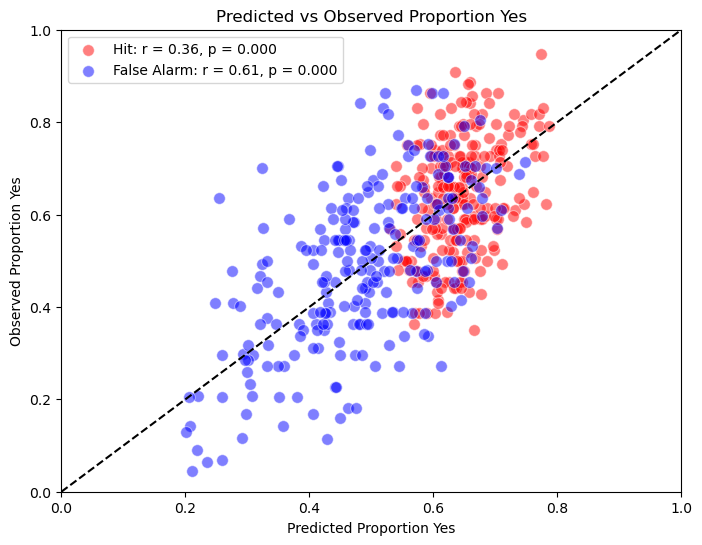

In [361]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_by_item.loc[df_by_item["resp_type"] == 'Hit'], 
                x='prop_yes_pred', y='prop_yes_obs', alpha=0.5, color='red', s=70,
                label=f'Hit: r = {pred_cors.loc[pred_cors["resp_type"]=="Hit", "r"].values[0]:.2f}, p = {pred_cors.loc[pred_cors["resp_type"]=="Hit", "p_value"].values[0]:.3f}')

sns.scatterplot(data=df_by_item.loc[df_by_item["resp_type"] == 'FA'], 
                x='prop_yes_pred', y='prop_yes_obs', alpha=0.5, color='blue', s = 70,
                label=f'False Alarm: r = {pred_cors.loc[pred_cors["resp_type"]=="FA", "r"].values[0]:.2f}, p = {pred_cors.loc[pred_cors["resp_type"]=="FA", "p_value"].values[0]:.3f}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line

plt.legend()

plt.xlabel("Predicted Proportion Yes")
plt.ylabel("Observed Proportion Yes")
plt.title("Predicted vs Observed Proportion Yes")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## 2. Each trial Each Individ

In [91]:
initial_params = [0.1, 0.1, 0.1, 0.1]  # c, alpha, beta, k

# Set bounds for parameters (optional but recommended)
bounds = [
    (0, None),      # c >= 0
    (0, None),      # alpha >= 0
    (0, None),      # beta >= 0
    (0, None)      # k >= 0
]

# Optimize
np.random.seed(1)  # For reproducibility
individ_hs_optim_gr1 = minimize(
    NegLogLikelihood,
    initial_params,
    args=(filtered_data_test.loc[filtered_data_test["group"]=="Group1"]),
    method='L-BFGS-B',  # Good for bounded optimization
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000},
)

# # Get optimized parameters
# individ_optimal_params_gr1 = individ_hs_optim_gr1.x
# c_opt_ind_gr1, alpha_opt_ind_gr1, beta_opt_ind_gr1, k_opt_ind_gr1 = individ_optimal_params_gr1

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11111D+04    |proj g|=  1.33381D+05

At iterate    1    f=  2.15386D+04    |proj g|=  5.44151D+02

At iterate    2    f=  2.13728D+04    |proj g|=  9.95695D+02

At iterate    3    f=  2.11687D+04    |proj g|=  2.72222D+03

At iterate    4    f=  2.10202D+04    |proj g|=  2.30633D+03

At iterate    5    f=  2.08288D+04    |proj g|=  5.48826D+03

At iterate    6    f=  2.06736D+04    |proj g|=  2.19749D+02

At iterate    7    f=  2.06678D+04    |proj g|=  2.07754D+02

At iterate    8    f=  2.06656D+04    |proj g|=  1.81675D+02

At iterate    9    f=  2.06609D+04    |proj g|=  1.29263D+02

At iterate   10    f=  2.06554D+04    |proj g|=  1.53423D+02

At iterate   11    f=  2.06514D+04    |proj g|=  1.27079D+02

At iterate   12    f=  2.06499D+04    |proj g|=  1.49351D+02

At iterate   13    f=  2.0

In [92]:
# Get optimized parameters
individ_optimal_params_gr1 = individ_hs_optim_gr1.x
c_opt_ind_gr1, alpha_opt_ind_gr1, beta_opt_ind_gr1, k_opt_ind_gr1 = individ_optimal_params_gr1

print(f"Optimal parameters for group 1:")
print(f"  c: {c_opt_ind_gr1}")
print(f"  alpha: {alpha_opt_ind_gr1}")
print(f"  beta: {beta_opt_ind_gr1}")
print(f"  k: {k_opt_ind_gr1}")
print(f"  NLL: {individ_hs_optim_gr1.fun}")
print(f"  Success: {individ_hs_optim_gr1.success}")

Optimal parameters for group 1:
  c: 0.7831980876356139
  alpha: 0.058787016628840484
  beta: 0.04314281759396182
  k: 1.4434249372509382
  NLL: 20646.272130301222
  Success: True


In [93]:
initial_params = [0.1, 0.1, 0.1, 0.1]  # c, alpha, beta, k

# Set bounds for parameters (optional but recommended)
bounds = [
    (0, None),      # c >= 0
    (0, None),      # alpha >= 0
    (0, None),      # beta >= 0
    (0, None)      # k >= 0
]

# Optimize
np.random.seed(1)  # For reproducibility
individ_hs_optim_gr2 = minimize(
    NegLogLikelihood,
    initial_params,
    args=(filtered_data_test.loc[filtered_data_test["group"]=="Group2"]),
    method='L-BFGS-B',  # Good for bounded optimization
    bounds=bounds,
    options={'disp': True, 'maxiter': 1000},
)

# # Get optimized parameters
# individ_optimal_params_gr2 = individ_hs_optim_gr2.x
# c_opt_ind_gr2, alpha_opt_ind_gr2, beta_opt_ind_gr2, k_opt_ind_gr2 = individ_optimal_params_gr2

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20701D+04    |proj g|=  8.56419D+04

At iterate    1    f=  1.34634D+04    |proj g|=  6.16009D+02

At iterate    2    f=  1.33659D+04    |proj g|=  6.43359D+02

At iterate    3    f=  1.31888D+04    |proj g|=  6.77367D+02

At iterate    4    f=  1.31075D+04    |proj g|=  2.26676D+03

At iterate    5    f=  1.29965D+04    |proj g|=  2.43246D+03

At iterate    6    f=  1.29020D+04    |proj g|=  7.01728D+02

At iterate    7    f=  1.28964D+04    |proj g|=  1.23862D+02

At iterate    8    f=  1.28960D+04    |proj g|=  9.58331D+01

At iterate    9    f=  1.28958D+04    |proj g|=  8.52391D+01

At iterate   10    f=  1.28947D+04    |proj g|=  4.10811D+01

At iterate   11    f=  1.28931D+04    |proj g|=  3.42970D+00

At iterate   12    f=  1.28909D+04    |proj g|=  1.11610D+00

At iterate   13    f=  1.2

In [94]:
# Get optimized parameters
individ_optimal_params_gr2 = individ_hs_optim_gr2.x
c_opt_ind_gr2, alpha_opt_ind_gr2, beta_opt_ind_gr2, k_opt_ind_gr2 = individ_optimal_params_gr2

print(f"Optimal parameters for group 2:")
print(f"  c: {c_opt_ind_gr2}")
print(f"  alpha: {alpha_opt_ind_gr2}")
print(f"  beta: {beta_opt_ind_gr2}")
print(f"  k: {k_opt_ind_gr2}")
print(f"  NLL: {individ_hs_optim_gr2.fun}")
print(f"  Success: {individ_hs_optim_gr2.success}")

Optimal parameters for group 2:
  c: 0.8505133001278404
  alpha: 0.04274793809684567
  beta: 0.014230098391014214
  k: 1.2286803598572253
  NLL: 12889.58423432388
  Success: True


In [95]:
# Predictions with per-group optimal parameters

dat1 = filtered_data_test[filtered_data_test['group']=='Group1'].copy()
dat1['preds'] = individ_hib_sim_model(individ_optimal_params_gr1, dat1)

dat2 = filtered_data_test[filtered_data_test['group']=='Group2'].copy()
dat2['preds'] = individ_hib_sim_model(individ_optimal_params_gr2, dat2)

# Add predictions to the original dataframe
filtered_data_test['preds'] = np.nan
filtered_data_test.loc[filtered_data_test['group']=='Group1', 'preds'] = dat1['preds'].values
filtered_data_test.loc[filtered_data_test['group']=='Group2', 'preds'] = dat2['preds'].values

#dat_all = pd.concat([dat1, dat2], ignore_index=True)

Since we predict the same probabilities for different subjects - we collapse the data set

In [107]:
df_by_item_individ = pd.merge(df_by_item, 
                              pd.pivot_table(filtered_data_test, 
                                           index=['image_id','group'], 
                                           values='preds', 
                                           aggfunc='mean',
                                           observed=True).reset_index().rename(columns={'preds':'prop_yes_pred_individ'}),
                              on=['image_id', 'group']
                              )
df_by_item_individ

,image_id,group,n_subj,n_yes,item_type,category_name,distinct_rating,prop_yes,resp_type,distinct_group,resp_group,prop_yes_pred_individ
0,2,Group1,131,61,Target,Andesite,3.93,0.465649,Hit,Middle,Hit_Group1,0.628877
1,2,Group2,81,28,Foil,Andesite,3.93,0.345679,FA,Middle,FA_Group2,0.423755
2,5,Group1,131,56,Foil,Andesite,3.32,0.427481,FA,Middle,FA_Group1,0.489841
3,5,Group2,81,46,Target,Andesite,3.32,0.567901,Hit,Middle,Hit_Group2,0.630897
4,6,Group1,131,86,Target,Andesite,3.17,0.656489,Hit,Middle,Hit_Group1,0.685213
...,...,...,...,...,...,...,...,...,...,...,...,...
475,474,Group2,81,52,Foil,Shale,1.91,0.641975,FA,Bottom,FA_Group2,0.677547
476,475,Group1,131,75,Target,Shale,4.05,0.572519,Hit,Middle,Hit_Group1,0.607020
477,475,Group2,81,50,Foil,Shale,4.05,0.617284,FA,Middle,FA_Group2,0.441141
478,476,Group1,131,89,Target,Shale,2.48,0.679389,Hit,Bottom,Hit_Group1,0.663517


In [120]:
# Correlation between observed and predicted probabilities
pred_cors_individ = df_by_item_individ.groupby('resp_type', observed=True, group_keys=False).apply(
    lambda x: pd.Series(
        stats.pearsonr(x['prop_yes'], x['prop_yes_pred_individ']),
        index=['r', 'p_value']
    ),
    include_groups=False  # <--- new parameter in pandas ≥2.2
).reset_index()
pred_cors_individ

,resp_type,r,p_value
0,FA,0.636013,1.309147e-28
1,Hit,0.400004,1.233562e-10


In [121]:
# Combined correlation
stats.pearsonr(df_by_item_individ['prop_yes'], df_by_item_individ['prop_yes_pred_individ'])

PearsonRResult(statistic=0.6781765341652428, pvalue=6.115460929776498e-66)

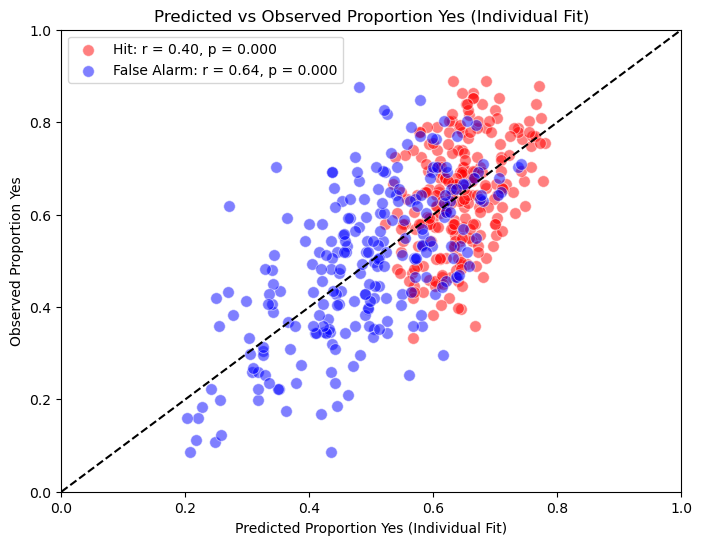

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_by_item_individ.loc[df_by_item_individ["resp_type"] == 'Hit'], 
                x='prop_yes_pred_individ', 
                y='prop_yes', 
                alpha=0.5, color='red', s=70,
                label=f'Hit: r = {pred_cors_individ.loc[pred_cors_individ["resp_type"]=="Hit", "r"].values[0]:.2f}, p = {pred_cors_individ.loc[pred_cors_individ["resp_type"]=="Hit", "p_value"].values[0]:.3f}'
                )
sns.scatterplot(data=df_by_item_individ.loc[df_by_item_individ["resp_type"] == 'FA'], 
                x='prop_yes_pred_individ', 
                y='prop_yes', 
                alpha=0.5, color='blue', s = 70,
                label=f'False Alarm: r = {pred_cors_individ.loc[pred_cors_individ["resp_type"]=="FA", "r"].values[0]:.2f}, p = {pred_cors_individ.loc[pred_cors_individ["resp_type"]=="FA", "p_value"].values[0]:.3f}'
                )
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line
plt.legend()
plt.xlabel("Predicted Proportion Yes (Individual Fit)")
plt.ylabel("Observed Proportion Yes")
plt.title("Predicted vs Observed Proportion Yes (Individual Fit)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# Save data

In [123]:
# Save only the variables you actually need
variables_to_save = {
    # all IDs
    'credited_IDs': credited_IDs,
    # Split-half lists
    'sh_corrs_hits': sh_corrs_hits,
    'sh_corrs_hits_random': sh_corrs_hits_random,
    'sh_corrs_fa': sh_corrs_fa,
    'sh_corrs_fa_random': sh_corrs_fa_random,
    
    # Aggregated by item
    'df_by_item': df_by_item,
    'df_by_item_wide': df_by_item_wide,
    
    # Distance matrices
    'dist_mat_gr1': dist_mat_gr1,
    'dist_mat_gr2': dist_mat_gr2,
    
    # Distinctiveness dictionary
    'distinctiveness_image_id': distinctiveness_image_id,
    
    # Optimizers for H-S model
    'individ_hs_optim_gr1': individ_hs_optim_gr1,
    'individ_hs_optim_gr2': individ_hs_optim_gr2,
    
    # Data with predictions
    # collapsed accross subjects
    # because predictions are the same for all subjects
    'df_by_item_individ': df_by_item_individ,
    
    # All data (test and memory phases)
    'filtered_data_test': filtered_data_test,
    'filtered_data_memory': filtered_data_memory,

    # Add other variables you want to keep
}

with open("Exp1_analysis.pkl", "wb") as f:
    dill.dump(variables_to_save, f)

In [128]:
filtered_data_test.loc[filtered_data_test['subject_id'] == credited_IDs[0]]

,trial_index,subject_id,group,task,item_type,response,correct_response,cor_ans,rt,category_name,category,broad_category,image_png,image_id,distinct_rating,good_subj,resp_type,responded_old,preds
0,248,90229,Group2,test_phase,Target,a,l,False,4494.0,Gabbro,4,I,I_Gabbro_06.png,54,3.26,True,Miss,0,0.662890
1,250,90229,Group2,test_phase,Target,l,l,True,1738.0,Rock Salt,28,S,S_Rock Salt_01.png,433,7.18,True,Hit,1,0.610745
2,252,90229,Group2,test_phase,Target,l,l,True,1053.0,Obsidian,6,I,I_Obsidian_06.png,86,8.01,True,Hit,1,0.553712
3,254,90229,Group2,test_phase,Target,l,l,True,3124.0,Granite,5,I,I_Granite_03.png,67,3.60,True,Hit,1,0.629682
4,256,90229,Group2,test_phase,Foil,a,a,True,4779.0,Dolomite,25,S,S_Dolomite_09.png,393,2.11,True,CR,0,0.447511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,718,90229,Group2,test_phase,Target,l,l,True,1442.0,Obsidian,6,I,I_Obsidian_12.png,92,5.70,True,Hit,1,0.663208
236,720,90229,Group2,test_phase,Foil,a,a,True,1881.0,Hornfels,14,M,M_Hornfels_12.png,220,2.62,True,CR,0,0.598193
237,722,90229,Group2,test_phase,Foil,l,a,False,1077.0,Bituminous Coal,21,S,S_Bituminous Coal_14.png,334,4.51,True,FA,1,0.618338
238,724,90229,Group2,test_phase,Foil,l,a,False,1073.0,Marble,15,M,M_Marble_13.png,237,3.80,True,FA,1,0.422238


In [ ]:
# filtered_data_test.to_csv("Exp1_filtered_data_test_phase.csv", index=False)
# filtered_data_memory.to_csv("Exp1_filtered_data_memory_phase.csv", index=False)